Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Overview:**

This notebook is built around a dataset that contains sports logging data collected from 16 individuals, consisting of thirteen men and three women. The participants are aged between 23 and 60 years, with an average age of 35 years. The data collection period spans from early November 2019 to the end of March 2020. These individuals come from varied training and fitness backgrounds, adding diversity to the dataset.

### The dataset was gathered using three sources:
- **Fitbit Versa 2**: Smartwatch wristbands used to track participants' activities and health metrics.
- **PMSys App**: A sports logging application that captures detailed exercise and sports-related information.
- **Google Forms**: Used for gathering additional participant input and self-reports.

## **Set Project Directory**

In [3]:
import os
os.chdir('/content/drive/MyDrive/00000000_FIVERR/datanalyst_28/Faizan Bhutto Portfolio/02 - SportsLog Data Project')
!pwd

/content/drive/MyDrive/00000000_FIVERR/datanalyst_28/Faizan Bhutto Portfolio/01 - Sports Logging Project


Import Necessary Libraries

In [4]:
import pandas as pd
import os
import json
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:

main_folder_path = 'Data/osfstorage-archive/pmdata'

## **Importing the Data**:

For this analysis, five dataframes were used:

### 1. User Data:
This dataframe contains the personal information of all 16 participants. Each participant is uniquely identified by an ID.

In [6]:
user_data = pd.read_excel(r'Data/osfstorage-archive/pmdata/participant-overview.xlsx',parse_dates=['Date'],
                          header=1)
user_data.head()

,Participant ID,Age,Height,Gender,A or B person,Max heart rate,Date,Minutes,Seconds,Stride walk,Stride run
0,p01,48,195,male,A,182,2019-11-26 00:00:00,29,33,80.9,102.9
1,p02,60,180,male,A,169,2019-12-15 00:00:00,23,51,74.7,92.4
2,p03,25,184,male,A,157,2019-12-30 00:00:00,33,22,NaN,NaN
3,p04,26,163,female,A,195,2019-11-19 00:00:00,22,13,67.3,110.2
4,p05,35,176,male,A,184,2019-12-23 00:00:00,32,40,73.0,94.3


In [7]:
user_data['Gender']=user_data['Gender'].str.strip()
user_data = user_data.drop(columns=['A or B person', 'Max heart rate', 'Date', 'Minutes', 'Seconds', 'Stride walk', 'Stride run'])
user_data.head()

,Participant ID,Age,Height,Gender
0,p01,48,195,male
1,p02,60,180,male
2,p03,25,184,male
3,p04,26,163,female
4,p05,35,176,male


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant ID  16 non-null     object
 1   Age             16 non-null     int64 
 2   Height          16 non-null     int64 
 3   Gender          16 non-null     object
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [9]:
user_data.describe()

,Age,Height
count,16.000000,16.000000
mean,34.875000,179.625000
std,11.672618,6.781101
min,23.000000,163.000000
25%,26.000000,177.750000
50%,29.000000,180.000000
75%,42.750000,182.250000
max,60.000000,195.000000


The dataset consists of 16 participants with an average age of 34.88 years and a height of 179.63 cm. The age ranges from 23 to 60 years, while heights vary between 163 cm and 195 cm. The data shows a higher concentration of participants aged around 29 years, with the middle 50% of heights falling between 177.75 cm and 182.25 cm.

### 2. Calories Data:

This dataframe logs the calories burned by each participant throughout the reporting period, covering the specified months.

In [10]:
#list calorie data
calories_list = []

In [11]:
# 16 main folders (each folder corresponds to a participant)
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    #check if the "fitbit" subfolder exists for the participant
    if os.path.exists(folder_path):
        print(f"'fitbit' folder found for user: {folder_name}")
    else:
        print(f"'fitbit' folder not found for user: {folder_name}")

'fitbit' folder found for user: p01
'fitbit' folder found for user: p02
'fitbit' folder found for user: p03
'fitbit' folder found for user: p04
'fitbit' folder found for user: p05
'fitbit' folder found for user: p06
'fitbit' folder found for user: p07
'fitbit' folder found for user: p08
'fitbit' folder found for user: p09
'fitbit' folder found for user: p10
'fitbit' folder found for user: p11
'fitbit' folder found for user: p12
'fitbit' folder found for user: p13
'fitbit' folder found for user: p14
'fitbit' folder found for user: p15
'fitbit' folder found for user: p16
'fitbit' folder not found for user: participant-overview.xlsx


In [12]:
#check for 'calories.json' file
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'calories.json')

        #check if the 'calories.json' file exists
        if os.path.exists(file_path):
            print(f"'calories.json' found for user: {folder_name}")
        else:
            print(f"'calories.json' not found for user: {folder_name}")

'calories.json' found for user: p01
'calories.json' found for user: p02
'calories.json' found for user: p03
'calories.json' found for user: p04
'calories.json' found for user: p05
'calories.json' found for user: p06
'calories.json' found for user: p07
'calories.json' found for user: p08
'calories.json' found for user: p09
'calories.json' found for user: p10
'calories.json' found for user: p11
'calories.json' found for user: p12
'calories.json' found for user: p13
'calories.json' found for user: p14
'calories.json' found for user: p15
'calories.json' found for user: p16


In [13]:
#load 'calories.json'
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'calories.json')

        if os.path.exists(file_path):
            with open(file_path, 'r') as json_file:
                #JSON data from the file
                json_data = json.load(json_file)
                #dataframe
                df = pd.DataFrame(json_data)
                df['user_id'] = folder_name
                calories_list.append(df)

In [14]:
if len(calories_list) > 0:
    print("Sample data from one user:")
    print(calories_list[0].head())

Sample data from one user:
              dateTime value user_id
0  2019-11-01 00:00:00  1.39     p01
1  2019-11-01 00:01:00  1.39     p01
2  2019-11-01 00:02:00  1.39     p01
3  2019-11-01 00:03:00  1.39     p01
4  2019-11-01 00:04:00  1.39     p01


In [15]:
calories_data = pd.concat(calories_list, ignore_index=True)
#sort the data by 'user_id' and 'dateTime'
calories_data = calories_data.sort_values(by=['user_id', 'dateTime']).reset_index(drop=True)
calories_data.head()

,dateTime,value,user_id
0,2019-11-01 00:00:00,1.39,p01
1,2019-11-01 00:01:00,1.39,p01
2,2019-11-01 00:02:00,1.39,p01
3,2019-11-01 00:03:00,1.39,p01
4,2019-11-01 00:04:00,1.39,p01


In [16]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377529 entries, 0 to 3377528
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   dateTime  object
 1   value     object
 2   user_id   object
dtypes: object(3)
memory usage: 77.3+ MB


In [17]:
calories_data.head()

,dateTime,value,user_id
0,2019-11-01 00:00:00,1.39,p01
1,2019-11-01 00:01:00,1.39,p01
2,2019-11-01 00:02:00,1.39,p01
3,2019-11-01 00:03:00,1.39,p01
4,2019-11-01 00:04:00,1.39,p01


### 3. Exercise Data:

This dataframe contains a log of all exercise activities recorded for each participant throughout the reporting period.

In [18]:
#exercise data
exercise = []

In [19]:
#check for 'exercise.json' file
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'exercise.json')

        if os.path.exists(file_path):
            print(f"'exercise.json' found for user: {folder_name}")
        else:
            print(f"'exercise.json' not found for user: {folder_name}")

'exercise.json' found for user: p01
'exercise.json' found for user: p02
'exercise.json' found for user: p03
'exercise.json' found for user: p04
'exercise.json' found for user: p05
'exercise.json' found for user: p06
'exercise.json' found for user: p07
'exercise.json' found for user: p08
'exercise.json' found for user: p09
'exercise.json' found for user: p10
'exercise.json' found for user: p11
'exercise.json' found for user: p12
'exercise.json' found for user: p13
'exercise.json' found for user: p14
'exercise.json' found for user: p15
'exercise.json' found for user: p16


In [20]:
#load 'exercise.json' data
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'exercise.json')

        if os.path.exists(file_path):
            with open(file_path, 'r') as json_file:
                json_data = json.load(json_file)
                df = pd.DataFrame(json_data)
                df['user_id'] = folder_name
                exercise.append(df)

In [21]:
if len(exercise) > 0:
    print("Sample data from one user:")
    print(exercise[0].head())

Sample data from one user:
         logId activityName  activityTypeId  \
0  26451905128         Walk           90013   
1  26455950499         Walk           90013   
2  26467488515         Walk           90013   
3  26520401069         Walk           90013   
4  26538035127         Walk           90013   

                                                                                                                                  activityLevel  \
0   [{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 14, 'name': 'very'}]   
1  [{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 12, 'name': 'fairly'}, {'minutes': 23, 'name': 'very'}]   
2  [{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 11, 'name': 'fairly'}, {'minutes': 30, 'name': 'very'}]   
3    [{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 7, 'name': '

In [22]:
exercise_data = pd.concat(exercise, ignore_index=True)
exercise_data = exercise_data.sort_values(by=['user_id']).reset_index(drop=True)
exercise_data.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,manualValuesSpecified,heartRateZones,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max,user_id,swimLengths,poolLength,poolLengthUnit,customHeartRateZones
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 14, 'name': 'very'}]",94.0,192,1331000,1331000,1878.0,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 20}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/01/19 15:29:27,2019-11-01 14:56:32,11/01/19 14:56:32,1331000,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN,NaN
1,28322488597,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 0, 'name': 'fairly'}, {'minutes': 41, 'name': 'very'}]",155.0,714,2474000,2467000,6723.0,tracker,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 1}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 3}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 37}]",01/25/20 11:54:02,2020-01-25 11:08:43,01/25/20 11:08:43,2474000,94.488,True,True,6.810515,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/28322488597?export=tcx,9.873383,364.616665,{'vo2Max': 46.915940000000006},p01,NaN,NaN,NaN,NaN
2,28367495138,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 3, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 6, 'name': 'very'}]",91.0,127,973000,973000,1090.0,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 2}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 15}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 0}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}]",01/25/20 19:43:00,2020-01-25 19:14:56,01/25/20 19:14:56,973000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN,NaN
3,28380392850,Walk,90013,"[{'minutes': 2, 'name': 'sedentary'}, {'minutes': 3, 'name': 'lightly'}, {'minutes': 7, 'name': 'fairly'}, {'minutes': 65, 'name': 'very'}]",101.0,748,4659000,4659000,7356.0,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 5}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 69}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 1}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}]",01/26/20 14:35:54,2020-01-26 13:10:08,01/26/20 13:10:08,4659000,36.576,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN,NaN
4,28442873868,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 19, 'name': 'fairly'}, {'minutes': 48, 'name': 'very'}]",100.0,617,4096000,4096000,5550.0,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 68}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 0}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}]",01/28/20 16:36:25,2020-01-28 15:19:00,01/28/20 15:19:00,4096000,54.864,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN,NaN


In [23]:
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   logId                  2440 non-null   int64  
 1   activityName           2440 non-null   object 
 2   activityTypeId         2440 non-null   int64  
 3   activityLevel          2440 non-null   object 
 4   averageHeartRate       2427 non-null   float64
 5   calories               2440 non-null   int64  
 6   duration               2440 non-null   int64  
 7   activeDuration         2440 non-null   int64  
 8   steps                  2271 non-null   float64
 9   logType                2440 non-null   object 
 10  manualValuesSpecified  2440 non-null   object 
 11  heartRateZones         2425 non-null   object 
 12  lastModified           2440 non-null   object 
 13  startTime              2440 non-null   object 
 14  originalStartTime      2440 non-null   object 
 15  orig

The dataset contains 2,440 entries with 31 columns, capturing various exercise-related metrics. Most columns are complete, but some, like "steps," "elevationGain," and "distance," have missing values. Key metrics include heart rate, calories burned, and duration, with some columns specific to activities such as swimming and GPS-tracked exercises.

In [24]:
exercise_data.describe()

,logId,activityTypeId,averageHeartRate,calories,duration,activeDuration,steps,originalDuration,elevationGain,distance,speed,pace,swimLengths,poolLength
count,2.440000e+03,2440.000000,2427.000000,2440.000000,2.440000e+03,2.440000e+03,2271.000000,2.440000e+03,2282.000000,623.000000,623.000000,344.000000,6.000000,6.0
mean,2.815021e+10,68270.501639,113.137618,349.535656,2.516525e+06,2.431405e+06,3698.003963,2.513418e+06,62.500965,6.210736,7.479433,830.746428,69.000000,25.0
std,9.741191e+08,35522.471012,20.392076,305.839276,2.829184e+06,2.687700e+06,3006.846109,2.827906e+06,126.883498,4.927840,3.192450,1756.985738,47.526835,0.0
min,2.642124e+10,1071.000000,0.000000,0.000000,4.000000e+03,1.000000e+03,0.000000,4.000000e+03,0.000000,0.000000,0.000000,299.384498,23.000000,25.0
25%,2.728264e+10,20049.000000,99.000000,153.000000,1.178000e+06,1.178000e+06,1629.000000,1.178000e+06,8.534000,3.091960,5.631770,371.067224,31.500000,25.0
50%,2.813673e+10,90013.000000,107.000000,232.000000,1.741000e+06,1.690000e+06,2535.000000,1.741000e+06,24.384000,5.287085,8.080881,440.496423,54.500000,25.0
75%,2.891933e+10,90013.000000,123.000000,453.000000,3.020250e+06,2.878750e+06,4893.500000,3.013000e+06,57.912000,8.385620,9.666844,651.692137,112.000000,25.0
max,3.002999e+10,90024.000000,180.000000,2340.000000,5.452200e+07,5.451900e+07,24119.000000,5.452200e+07,1551.432000,42.178875,20.058250,26300.578035,127.000000,25.0


The average heart rate is 113 bpm, with a maximum of 180 bpm, while the average calories burned is 350. The steps taken range from 0 to 24,119, and the distance covered varies significantly, with an average of 6.2 km but a maximum of 42.2 km. Data related to swimming, such as swim lengths and pool length, is limited to just 6 records.

In [25]:
exercise_data.logType.value_counts()

,count
logType,
auto_detected,1687
tracker,744
manual,7
mobile_run,2


We will only keep auto & detected actovities data

In [26]:
exercise_df = exercise_data[~exercise_data['logType'].isin(['manual', 'mobile_run'])]
exercise_df.logType.value_counts()

,count
logType,
auto_detected,1687
tracker,744


Drop Unnecessary Columns

In [27]:
exercise_df.columns

Index(['logId', 'activityName', 'activityTypeId', 'activityLevel',
       'averageHeartRate', 'calories', 'duration', 'activeDuration', 'steps',
       'logType', 'manualValuesSpecified', 'heartRateZones', 'lastModified',
       'startTime', 'originalStartTime', 'originalDuration', 'elevationGain',
       'hasGps', 'shouldFetchDetails', 'distance', 'distanceUnit', 'source',
       'tcxLink', 'speed', 'pace', 'vo2Max', 'user_id', 'swimLengths',
       'poolLength', 'poolLengthUnit', 'customHeartRateZones'],
      dtype='object')

In [28]:
exercise_df = exercise_df.drop(columns=['source', 'activityTypeId', 'swimLengths', 'poolLength',
                                        'shouldFetchDetails', 'hasGps', 'lastModified',
                                        'tcxLink', 'manualValuesSpecified', 'logType',
                                        'originalStartTime', 'originalDuration'])

exercise_df.columns

Index(['logId', 'activityName', 'activityLevel', 'averageHeartRate',
       'calories', 'duration', 'activeDuration', 'steps', 'heartRateZones',
       'startTime', 'elevationGain', 'distance', 'distanceUnit', 'speed',
       'pace', 'vo2Max', 'user_id', 'poolLengthUnit', 'customHeartRateZones'],
      dtype='object')

Convert startTime to DateTime

In [29]:
exercise_df['startTime'] = pd.to_datetime(exercise_df['startTime'])
exercise_df.dtypes

,0
logId,int64
activityName,object
activityLevel,object
averageHeartRate,float64
calories,int64
duration,int64
activeDuration,int64
steps,float64
heartRateZones,object
startTime,datetime64[ns]


Extract Features
- Create Columns for Each Heart Rate Zone
- Extract Activity Level Minutes

In [30]:
#get minutes per heart rate zone into a dictionary
exercise_df['hrz_minutes'] = exercise_df['heartRateZones'].apply(
    lambda x: {entry['name']: entry['minutes'] for entry in x} if isinstance(x, list) else {}
)

exercise_df[['hrz_minutes']].head()

,hrz_minutes
0,"{'Out of Range': 1, 'Fat Burn': 20, 'Cardio': 0, 'Peak': 0}"
1,"{'Out of Range': 0, 'Fat Burn': 1, 'Cardio': 3, 'Peak': 37}"
2,"{'Out of Range': 2, 'Fat Burn': 15, 'Cardio': 0, 'Peak': 0}"
3,"{'Out of Range': 5, 'Fat Burn': 69, 'Cardio': 1, 'Peak': 0}"
4,"{'Out of Range': 1, 'Fat Burn': 68, 'Cardio': 0, 'Peak': 0}"


In [31]:
exercise_df['out_of_range_minutes'] = exercise_df['hrz_minutes'].apply(lambda x: x.get('Out of Range', 0))
exercise_df['fat_burn_minutes'] = exercise_df['hrz_minutes'].apply(lambda x: x.get('Fat Burn', 0))
exercise_df['cardio_minutes'] = exercise_df['hrz_minutes'].apply(lambda x: x.get('Cardio', 0))
exercise_df['peak_minutes'] = exercise_df['hrz_minutes'].apply(lambda x: x.get('Peak', 0))

In [32]:
exercise_df[['out_of_range_minutes', 'fat_burn_minutes', 'cardio_minutes', 'peak_minutes']].head()

,out_of_range_minutes,fat_burn_minutes,cardio_minutes,peak_minutes
0,1,20,0,0
1,0,1,3,37
2,2,15,0,0
3,5,69,1,0
4,1,68,0,0


In [33]:
#extract minutes per activity level
exercise_df['minutes'] = exercise_df['activityLevel'].apply(
    lambda x: {entry['name']: entry['minutes'] for entry in x}
)

exercise_df[['minutes']].head()

,minutes
0,"{'sedentary': 0, 'lightly': 0, 'fairly': 8, 'very': 14}"
1,"{'sedentary': 0, 'lightly': 0, 'fairly': 0, 'very': 41}"
2,"{'sedentary': 0, 'lightly': 3, 'fairly': 8, 'very': 6}"
3,"{'sedentary': 2, 'lightly': 3, 'fairly': 7, 'very': 65}"
4,"{'sedentary': 0, 'lightly': 1, 'fairly': 19, 'very': 48}"


In [34]:
exercise_df['minutes_sedentary'] = exercise_df['minutes'].apply(lambda x: x.get('sedentary', 0))
exercise_df['minutes_lightly_active'] = exercise_df['minutes'].apply(lambda x: x.get('lightly', 0))
exercise_df['minutes_fairly_active'] = exercise_df['minutes'].apply(lambda x: x.get('fairly', 0))
exercise_df['minutes_very_active'] = exercise_df['minutes'].apply(lambda x: x.get('very', 0))

In [35]:
exercise_df[['minutes_sedentary', 'minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active']].head()

,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active
0,0,0,8,14
1,0,0,0,41
2,0,3,8,6
3,2,3,7,65
4,0,1,19,48


Day of the Week Column

In [36]:
exercise_df['day_of_week'] = exercise_df['startTime'].dt.strftime('%A')
exercise_df[['day_of_week']].head()

,day_of_week
0,Friday
1,Saturday
2,Saturday
3,Sunday
4,Tuesday


In [37]:
exercises = exercise_df.merge(user_data, left_on='user_id', right_on='Participant ID', how='left')
exercises.head()

,logId,activityName,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,heartRateZones,startTime,elevationGain,distance,distanceUnit,speed,pace,vo2Max,user_id,poolLengthUnit,customHeartRateZones,hrz_minutes,out_of_range_minutes,fat_burn_minutes,cardio_minutes,peak_minutes,minutes,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,day_of_week,Participant ID,Age,Height,Gender
0,26451905128,Walk,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 14, 'name': 'very'}]",94.0,192,1331000,1331000,1878.0,"[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 20}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",2019-11-01 14:56:32,24.384,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 1, 'Fat Burn': 20, 'Cardio': 0, 'Peak': 0}",1,20,0,0,"{'sedentary': 0, 'lightly': 0, 'fairly': 8, 'very': 14}",0,0,8,14,Friday,p01,48,195,male
1,28322488597,Run,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 0, 'name': 'fairly'}, {'minutes': 41, 'name': 'very'}]",155.0,714,2474000,2467000,6723.0,"[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 1}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 3}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 37}]",2020-01-25 11:08:43,94.488,6.810515,Kilometer,9.873383,364.616665,{'vo2Max': 46.915940000000006},p01,NaN,NaN,"{'Out of Range': 0, 'Fat Burn': 1, 'Cardio': 3, 'Peak': 37}",0,1,3,37,"{'sedentary': 0, 'lightly': 0, 'fairly': 0, 'very': 41}",0,0,0,41,Saturday,p01,48,195,male
2,28367495138,Walk,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 3, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 6, 'name': 'very'}]",91.0,127,973000,973000,1090.0,"[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 2}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 15}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 0}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}]",2020-01-25 19:14:56,3.048,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 2, 'Fat Burn': 15, 'Cardio': 0, 'Peak': 0}",2,15,0,0,"{'sedentary': 0, 'lightly': 3, 'fairly': 8, 'very': 6}",0,3,8,6,Saturday,p01,48,195,male
3,28380392850,Walk,"[{'minutes': 2, 'name': 'sedentary'}, {'minutes': 3, 'name': 'lightly'}, {'minutes': 7, 'name': 'fairly'}, {'minutes': 65, 'name': 'very'}]",101.0,748,4659000,4659000,7356.0,"[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 5}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 69}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 1}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}]",2020-01-26 13:10:08,36.576,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 5, 'Fat Burn': 69, 'Cardio': 1, 'Peak': 0}",5,69,1,0,"{'sedentary': 2, 'lightly': 3, 'fairly': 7, 'very': 65}",2,3,7,65,Sunday,p01,48,195,male
4,28442873868,Walk,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 19, 'name': 'fairly'}, {'minutes': 48, 'name': 'very'}]",100.0,617,4096000,4096000,5550.0,"[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 68}, {'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 0}, {'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}]",2020-01-28 15:19:00,54.864,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 1, 'Fat Burn': 68, 'Cardio': 0, 'Peak': 0}",1,68,0,0,"{'sedentary': 0, 'lightly': 1, 'fairly': 19, 'very': 48}",0,1,19,48,Tuesday,p01,48,195,male


In [38]:
#dropping oriignnal cols
exercises = exercises.drop(columns=['heartRateZones', 'minutes', 'activityLevel'])
exercises.head()

,logId,activityName,averageHeartRate,calories,duration,activeDuration,steps,startTime,elevationGain,distance,distanceUnit,speed,pace,vo2Max,user_id,poolLengthUnit,customHeartRateZones,hrz_minutes,out_of_range_minutes,fat_burn_minutes,cardio_minutes,peak_minutes,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,day_of_week,Participant ID,Age,Height,Gender
0,26451905128,Walk,94.0,192,1331000,1331000,1878.0,2019-11-01 14:56:32,24.384,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 1, 'Fat Burn': 20, 'Cardio': 0, 'Peak': 0}",1,20,0,0,0,0,8,14,Friday,p01,48,195,male
1,28322488597,Run,155.0,714,2474000,2467000,6723.0,2020-01-25 11:08:43,94.488,6.810515,Kilometer,9.873383,364.616665,{'vo2Max': 46.915940000000006},p01,NaN,NaN,"{'Out of Range': 0, 'Fat Burn': 1, 'Cardio': 3, 'Peak': 37}",0,1,3,37,0,0,0,41,Saturday,p01,48,195,male
2,28367495138,Walk,91.0,127,973000,973000,1090.0,2020-01-25 19:14:56,3.048,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 2, 'Fat Burn': 15, 'Cardio': 0, 'Peak': 0}",2,15,0,0,0,3,8,6,Saturday,p01,48,195,male
3,28380392850,Walk,101.0,748,4659000,4659000,7356.0,2020-01-26 13:10:08,36.576,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 5, 'Fat Burn': 69, 'Cardio': 1, 'Peak': 0}",5,69,1,0,2,3,7,65,Sunday,p01,48,195,male
4,28442873868,Walk,100.0,617,4096000,4096000,5550.0,2020-01-28 15:19:00,54.864,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,"{'Out of Range': 1, 'Fat Burn': 68, 'Cardio': 0, 'Peak': 0}",1,68,0,0,0,1,19,48,Tuesday,p01,48,195,male


In [39]:
#calculate duration in minutes
exercises['duration[min]'] = exercises['duration'] / 60000
exercises[['duration', 'duration[min]']].head()

,duration,duration[min]
0,1331000,22.183333
1,2474000,41.233333
2,973000,16.216667
3,4659000,77.650000
4,4096000,68.266667


Calculate Calories Burned per Minute

In [40]:
exercises['Cal/Min'] = exercises['calories'] / exercises['duration[min]']
exercises[['calories', 'duration[min]', 'Cal/Min']].head()

,calories,duration[min],Cal/Min
0,192,22.183333,8.655147
1,714,41.233333,17.316087
2,127,16.216667,7.831449
3,748,77.650000,9.632968
4,617,68.266667,9.038086


In [41]:
exercises_exploratory = exercises.drop(columns=['averageHeartRate','logId','duration','activeDuration','startTime','elevationGain', 'distance','speed','pace',
                                                'Age','Height','Cal/Min'])
exercises_exploratory.describe()

,calories,steps,out_of_range_minutes,fat_burn_minutes,cardio_minutes,peak_minutes,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,duration[min]
count,2431.000000,2262.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000
mean,348.446730,3697.681698,6.911970,21.695187,8.279309,2.633073,2.745784,3.873303,5.396545,28.137803,41.568504
std,303.831869,3004.662935,31.837468,19.922991,16.157065,7.838564,27.711736,8.892198,7.183364,25.158124,46.007593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
25%,153.000000,1630.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,19.633333
50%,232.000000,2535.000000,2.000000,17.000000,0.000000,0.000000,0.000000,1.000000,3.000000,20.000000,28.950000
75%,452.500000,4888.750000,6.000000,27.000000,9.000000,0.000000,1.000000,4.000000,7.000000,37.500000,50.183333
max,2340.000000,24119.000000,830.000000,167.000000,114.000000,96.000000,769.000000,222.000000,90.000000,175.000000,908.700000


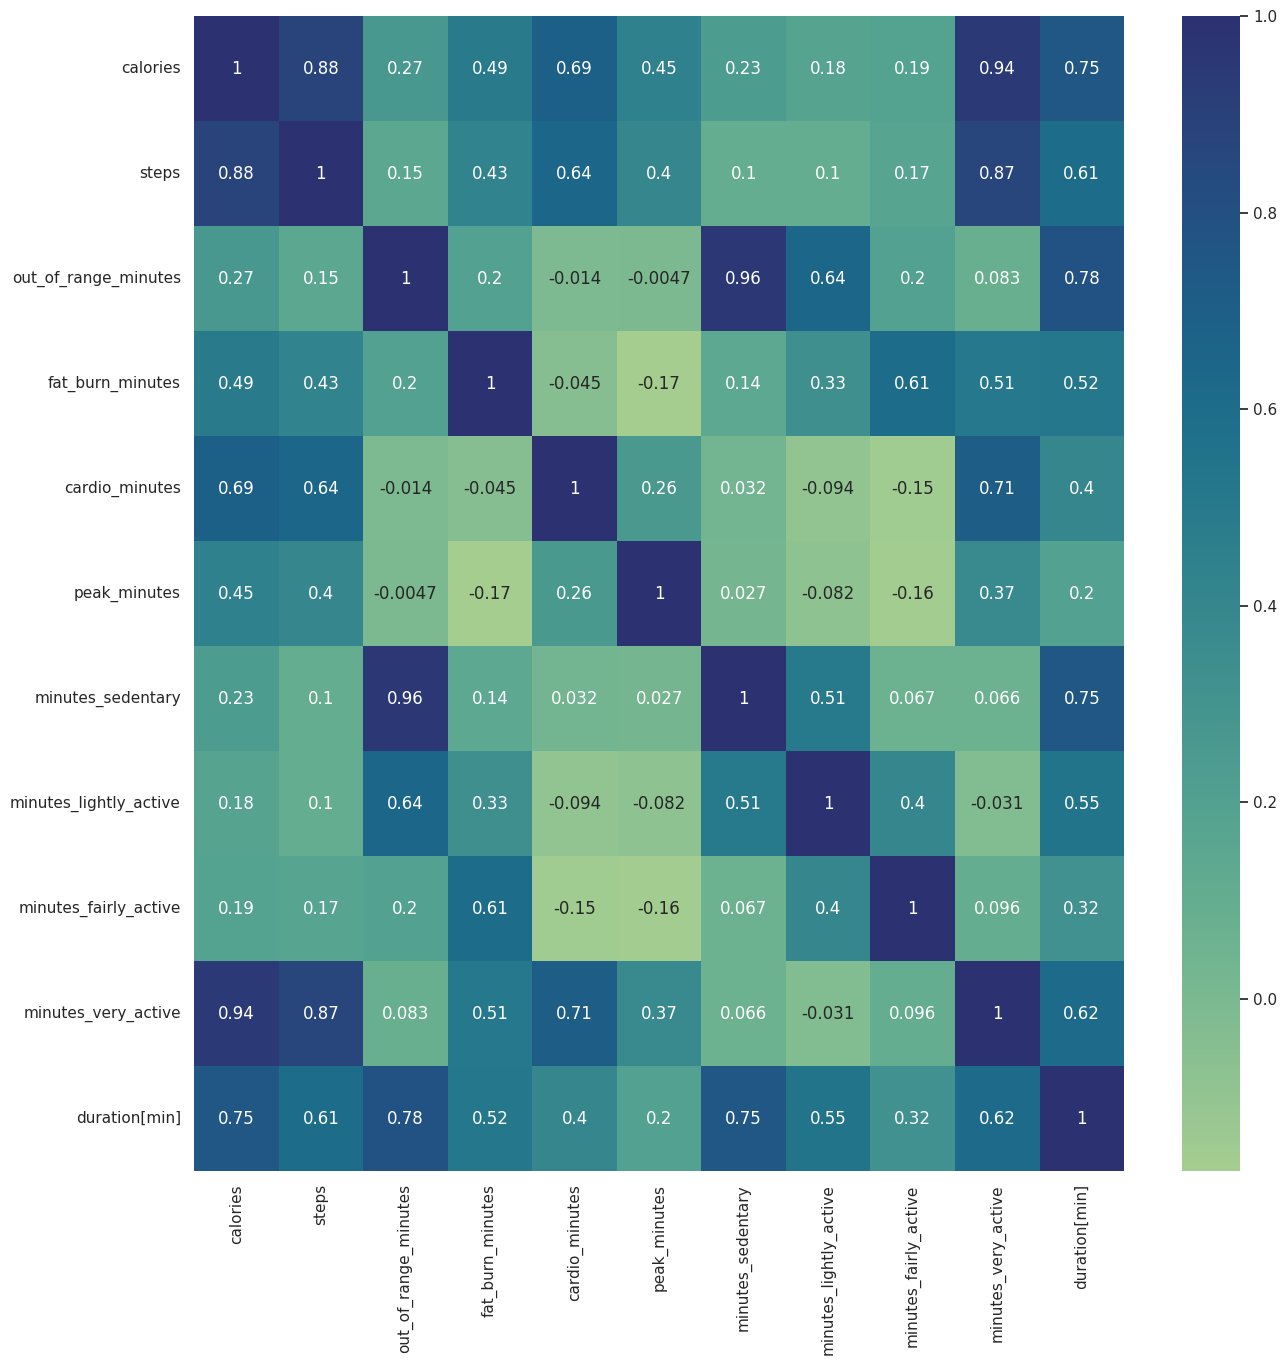

In [42]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.set(font_scale=1)
heatmap = sns.heatmap(exercises_exploratory.corr(numeric_only = True),annot=True,cmap='crest')
plt.yticks(rotation=0, ha='right')
plt.show();

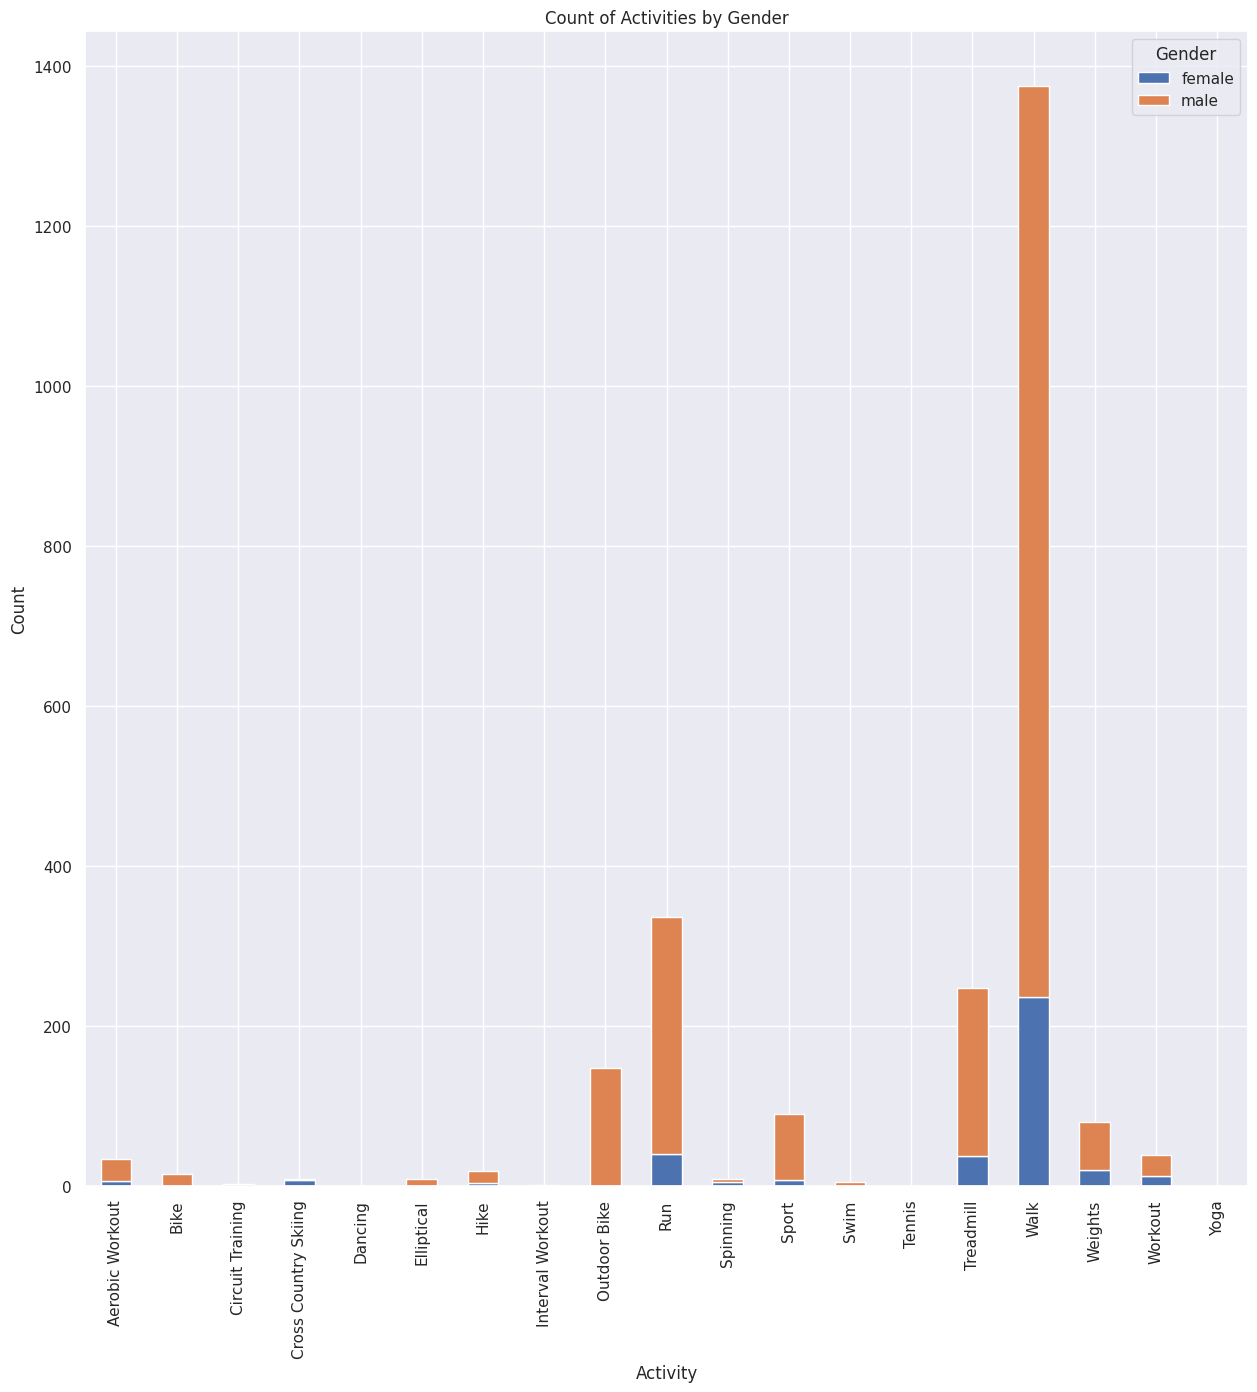

In [43]:
exercises_analysis = exercises[exercises['calories']>0]
most_popular_activity = exercises_analysis.groupby(['activityName','Gender'])['logId'].count().sort_values(ascending=False)
pivot_data = most_popular_activity .unstack()
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Count of Activities by Gender')
plt.legend(title='Gender')
plt.show()

In [44]:
exercises_analysis.value_counts('activityName')

,count
activityName,
Walk,1374
Run,336
Treadmill,248
Outdoor Bike,148
Sport,91
Weights,81
Workout,39
Aerobic Workout,34
Hike,19


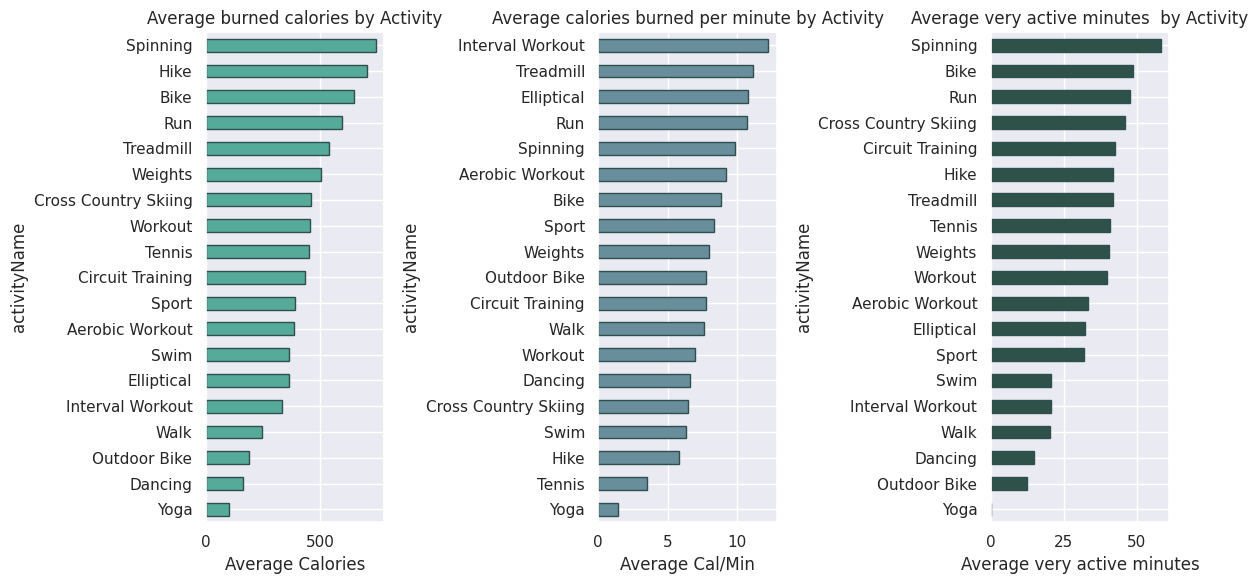

In [45]:
average_calories_activity = exercises_analysis.groupby('activityName')['calories'].mean().sort_values()
average_activity_duration = exercises_analysis.groupby('activityName')['minutes_very_active'].mean().sort_values()
average_cal_min_activity =exercises_analysis.groupby('activityName')['Cal/Min'].mean().sort_values()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

average_calories_activity.plot(kind='barh', color='#55aa99', edgecolor='darkslategrey', ax=axes[0])
axes[0].set(title='Average burned calories by Activity', xlabel='Average Calories')


average_activity_duration.plot(kind='barh', color='#2e524a', edgecolor='darkslategrey', ax=axes[2])
axes[2].set(title='Average very active minutes  by Activity', xlabel='Average very active minutes')

average_cal_min_activity.plot(kind='barh', color='#698e9b', edgecolor='darkslategrey', ax=axes[1])
axes[1].set(title='Average calories burned per minute by Activity', xlabel='Average Cal/Min')

plt.tight_layout()
plt.show()

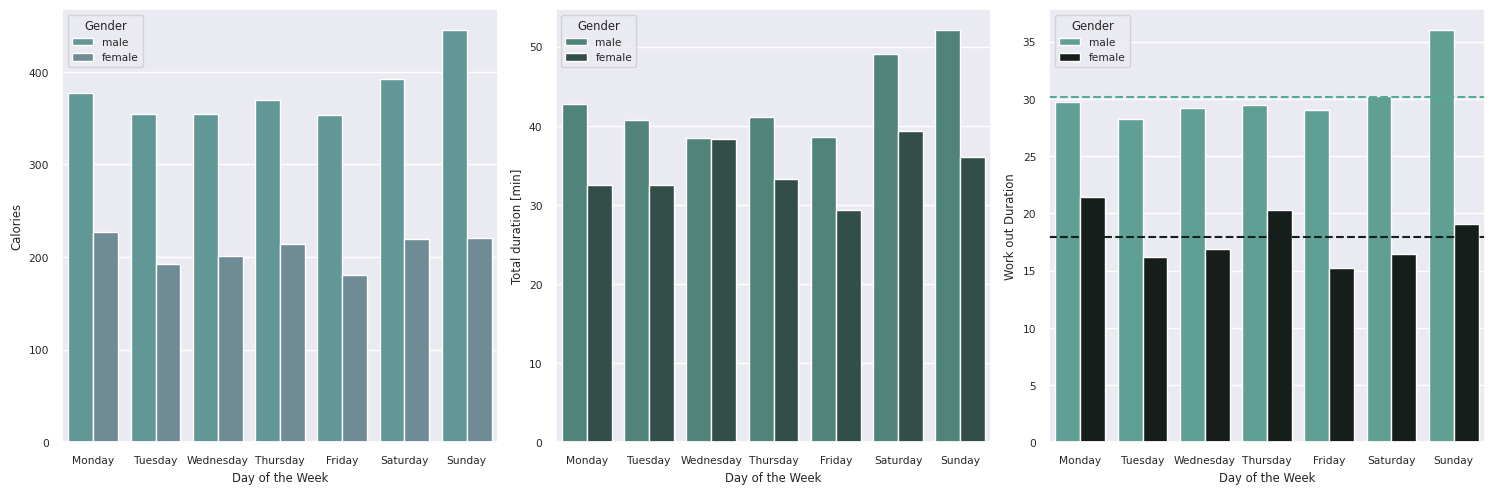

In [46]:
average_active_minutes = exercises_analysis.groupby('Gender')['minutes_very_active'].mean()
colors_active = {'male': '#55aa99', 'female': '#151f1d'}

colors_dur = {'male': '#488b7e', 'female': '#2e524a'}

colors_cal = {'male': '#59a0a1', 'female': '#698e9b'}

day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set(font_scale=0.7)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x='day_of_week',
            y='calories',
            data=exercises_analysis,
            hue='Gender',
            order=day_of_week_order,
            errorbar=None,
            palette= colors_cal,
            ax=axes[0])

axes[0].set(xlabel='Day of the Week', ylabel='Calories')

sns.barplot(x='day_of_week',
            y='duration[min]',
            data=exercises_analysis,
            hue='Gender',
            order=day_of_week_order,
            palette=colors_dur,
            errorbar=None,
            ax=axes[1])

axes[1].set(xlabel='Day of the Week', ylabel='Total duration [min]')

sns.barplot(x='day_of_week',
            y='minutes_very_active',
            data=exercises_analysis,
            hue='Gender',
            order=day_of_week_order,
            errorbar=None,
            palette= colors_active,
            ax=axes[2])

for gender, avg_min in average_active_minutes.items():
    plt.axhline(y=avg_min, color=colors_active[gender], linestyle='--', label=f'Average {gender}')

axes[2].set(xlabel='Day of the Week', ylabel='Work out Duration')
plt.tight_layout()
plt.show()

### 4. Sleep Data:

This dataframe contains a log of sleeps recorded for each participant throughout the reporting period.

In [47]:
sleep = []
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')
    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'sleep.json')
        if os.path.exists(file_path):
            print(f"'sleep.json' found for user: {folder_name}")
        else:
            print(f"'sleep.json' not found for user: {folder_name}")

'sleep.json' found for user: p01
'sleep.json' found for user: p02
'sleep.json' found for user: p03
'sleep.json' found for user: p04
'sleep.json' found for user: p05
'sleep.json' found for user: p06
'sleep.json' found for user: p07
'sleep.json' found for user: p08
'sleep.json' found for user: p09
'sleep.json' found for user: p10
'sleep.json' found for user: p11
'sleep.json' found for user: p12
'sleep.json' found for user: p13
'sleep.json' found for user: p14
'sleep.json' found for user: p15
'sleep.json' found for user: p16


In [48]:
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'sleep.json')

        if os.path.exists(file_path):
            with open(file_path, 'r') as json_file:
                json_data = json.load(json_file)
                df = pd.DataFrame(json_data)
                df['user_id'] = folder_name
                sleep.append(df)

In [49]:
sleep_data = pd.concat(sleep, ignore_index=True).sort_values(by=['user_id', 'dateOfSleep']).reset_index(drop=True)
sleep_data.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep,user_id
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 36, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 26, 'minutes': 52, 'thirtyDayAvgMinutes': 42}, 'light': {'count': 30, 'minutes': 259, 'thirtyDayAvgMinutes': 249}, 'rem': {'count': 4, 'minutes': 83, 'thirtyDayAvgMinutes': 55}}, 'data': [{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}, {'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}, {'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}, {'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}, {'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}, {'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}, {'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}, {'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}, {'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}, {'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}, {'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}, {'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}, {'dateTime': '2019-11-02T06:35:00.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T06:54:00.000', 'level': 'light', 'seconds': 1080}, {'dateTime': '2019-11-02T07:12:00.000', 'level': 'wake', 'seconds': 450}], 'shortData': [{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T00:15:30.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T00:20:30.000', 'level': 'wake', 'seconds': 90}, {'dateTime': '2019-11-02T00:40:00.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T00:57:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T02:55:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T03:26:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T03:45:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T04:00:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T04:28:00.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T04:46:30.000', 'level': 'wake', 'seconds': 60}, {'dateTime': '2019-11-02T05:07:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T05:11:30.000', 'level': 'wake', 'seconds': 90}, {'dateTime': '2019-11-02T05:15:00.000', 'level': 'wake', 'seconds': 60}, {'dateTime': '2019-11-02T05:17:30.000', 'level': 'wake', 'seconds': 180}, {'dateTime': '2019-11-02T05:22:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T05:26:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T05:42:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T06:14:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T06:17:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T06:24:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T06:52:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T06:56:00.000', 'level': 'wake', 'seconds': 120}]}",True,p01
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,25320000,0,378,44,0,422,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 38, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 29, 'minutes': 44, 'thirtyDayAvgMinutes': 42}, 'light': {'count': 33, 'minutes': 289, 'thirtyDayAvgMi

This needs to be corrected

In [50]:
flattened_sleep = json_normalize(sleep_data['levels'])
df = flattened_sleep[['summary.deep.minutes', 'summary.wake.minutes', 'summary.light.minutes', 'summary.rem.minutes']]
df.columns = ['deepMinutes', 'wakeMinutes', 'lightMinutes', 'remMinutes']
df.head()

,deepMinutes,wakeMinutes,lightMinutes,remMinutes
0,36.0,52.0,259.0,83.0
1,38.0,44.0,289.0,51.0
2,37.0,38.0,289.0,35.0
3,27.0,36.0,260.0,39.0
4,66.0,23.0,237.0,38.0


In [51]:
sleeping = pd.concat([sleep_data, df], axis=1)
sleeping.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep,user_id,deepMinutes,wakeMinutes,lightMinutes,remMinutes
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 36, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 26, 'minutes': 52, 'thirtyDayAvgMinutes': 42}, 'light': {'count': 30, 'minutes': 259, 'thirtyDayAvgMinutes': 249}, 'rem': {'count': 4, 'minutes': 83, 'thirtyDayAvgMinutes': 55}}, 'data': [{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}, {'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}, {'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}, {'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}, {'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}, {'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}, {'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}, {'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}, {'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}, {'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}, {'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}, {'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}, {'dateTime': '2019-11-02T06:35:00.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T06:54:00.000', 'level': 'light', 'seconds': 1080}, {'dateTime': '2019-11-02T07:12:00.000', 'level': 'wake', 'seconds': 450}], 'shortData': [{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T00:15:30.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T00:20:30.000', 'level': 'wake', 'seconds': 90}, {'dateTime': '2019-11-02T00:40:00.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T00:57:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T02:55:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T03:26:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T03:45:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T04:00:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T04:28:00.000', 'level': 'wake', 'seconds': 150}, {'dateTime': '2019-11-02T04:46:30.000', 'level': 'wake', 'seconds': 60}, {'dateTime': '2019-11-02T05:07:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T05:11:30.000', 'level': 'wake', 'seconds': 90}, {'dateTime': '2019-11-02T05:15:00.000', 'level': 'wake', 'seconds': 60}, {'dateTime': '2019-11-02T05:17:30.000', 'level': 'wake', 'seconds': 180}, {'dateTime': '2019-11-02T05:22:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T05:26:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T05:42:00.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T06:14:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T06:17:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T06:24:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T06:52:00.000', 'level': 'wake', 'seconds': 120}, {'dateTime': '2019-11-02T06:56:00.000', 'level': 'wake', 'seconds': 120}]}",True,p01,36.0,52.0,259.0,83.0
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,25320000,0,378,44,0,422,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 38, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 29, 'minutes': 44, 'thirtyDayAvg

In [52]:
#convert 'duration' from milliseconds to hours and round
sleeping['duration[hr]'] = sleeping['duration'] / 3600000
sleeping['duration[hr]'] = sleeping['duration[hr]'].astype(int)

#convert 'timeInBed' from minutes to hours and round
sleeping['timeInBed[hr]'] = sleeping['timeInBed'] / 60
sleeping['timeInBed[hr]'] = sleeping['timeInBed[hr]'].astype(int)
sleeping[['duration[hr]', 'timeInBed[hr]']].head()

,duration[hr],timeInBed[hr]
0,7,7
1,7,7
2,6,6
3,6,6
4,6,6


In [53]:
sleeping['dateOfSleep'] = pd.to_datetime(sleeping['dateOfSleep'])
sleeping.dtypes

,0
logId,int64
dateOfSleep,datetime64[ns]
startTime,object
endTime,object
duration,int64
minutesToFallAsleep,int64
minutesAsleep,int64
minutesAwake,int64
minutesAfterWakeup,int64
timeInBed,int64


In [54]:
#drop the 'levels' column
sleeping = sleeping.drop(['levels'], axis=1)
sleeping.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,user_id,deepMinutes,wakeMinutes,lightMinutes,remMinutes,duration[hr],timeInBed[hr]
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,True,p01,36.0,52.0,259.0,83.0,7,7
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,25320000,0,378,44,0,422,96,stages,0,True,p01,38.0,44.0,289.0,51.0,7,7
2,24507914069,2019-11-04,2019-11-03 23:55:30,2019-11-04T06:35:00.000,23940000,0,361,38,0,399,96,stages,0,True,p01,37.0,38.0,289.0,35.0,6,6
3,24521896102,2019-11-05,2019-11-05 00:22:30,2019-11-05T06:25:00.000,21720000,0,326,36,1,362,99,stages,0,True,p01,27.0,36.0,260.0,39.0,6,6
4,24534036899,2019-11-06,2019-11-06 00:25:30,2019-11-06T06:29:30.000,21840000,0,341,23,1,364,99,stages,0,True,p01,66.0,23.0,237.0,38.0,6,6


In [55]:
sleeping = sleeping.merge(user_data, left_on='user_id', right_on='Participant ID', how='left')
sleeping.head(2)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,user_id,deepMinutes,wakeMinutes,lightMinutes,remMinutes,duration[hr],timeInBed[hr],Participant ID,Age,Height,Gender
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,True,p01,36.0,52.0,259.0,83.0,7,7,p01,48,195,male
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,25320000,0,378,44,0,422,96,stages,0,True,p01,38.0,44.0,289.0,51.0,7,7,p01,48,195,male


In [56]:
sleeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   logId                2064 non-null   int64         
 1   dateOfSleep          2064 non-null   datetime64[ns]
 2   startTime            2064 non-null   object        
 3   endTime              2064 non-null   object        
 4   duration             2064 non-null   int64         
 5   minutesToFallAsleep  2064 non-null   int64         
 6   minutesAsleep        2064 non-null   int64         
 7   minutesAwake         2064 non-null   int64         
 8   minutesAfterWakeup   2064 non-null   int64         
 9   timeInBed            2064 non-null   int64         
 10  efficiency           2064 non-null   int64         
 11  type                 2064 non-null   object        
 12  infoCode             2064 non-null   int64         
 13  mainSleep            2064 non-nul

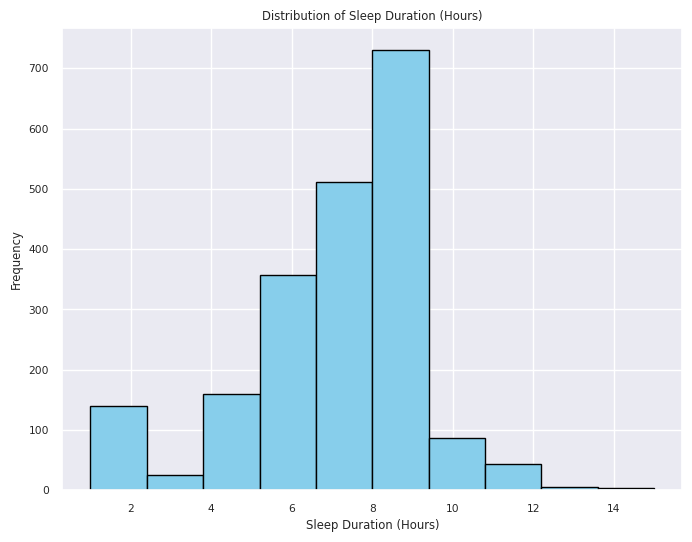

In [57]:
#distribution of sleep duration
plt.figure(figsize=(8, 6))
plt.hist(sleeping['duration[hr]'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Duration (Hours)')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

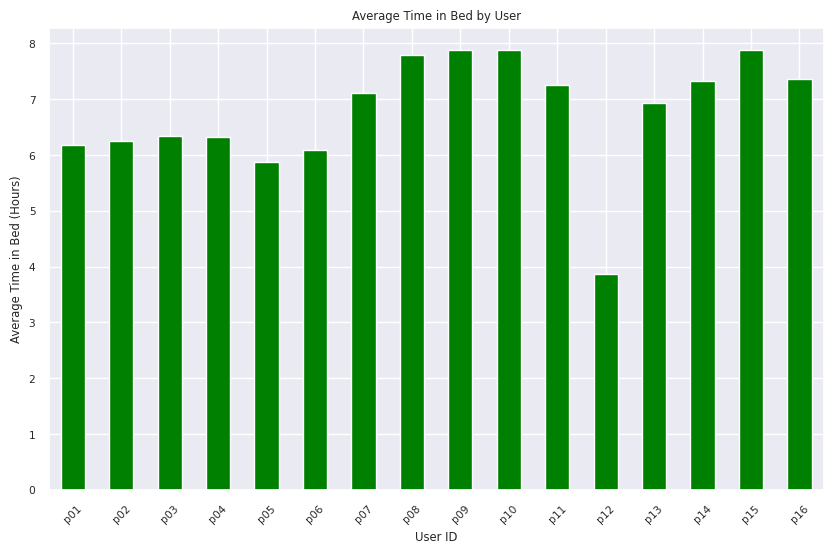

In [58]:
#bar plot showing average time in bed per user
avg_time_in_bed = sleeping.groupby('user_id')['timeInBed[hr]'].mean()

plt.figure(figsize=(10, 6))
avg_time_in_bed.plot(kind='bar', color='green')
plt.title('Average Time in Bed by User')
plt.xlabel('User ID')
plt.ylabel('Average Time in Bed (Hours)')
plt.xticks(rotation=45)
plt.show()

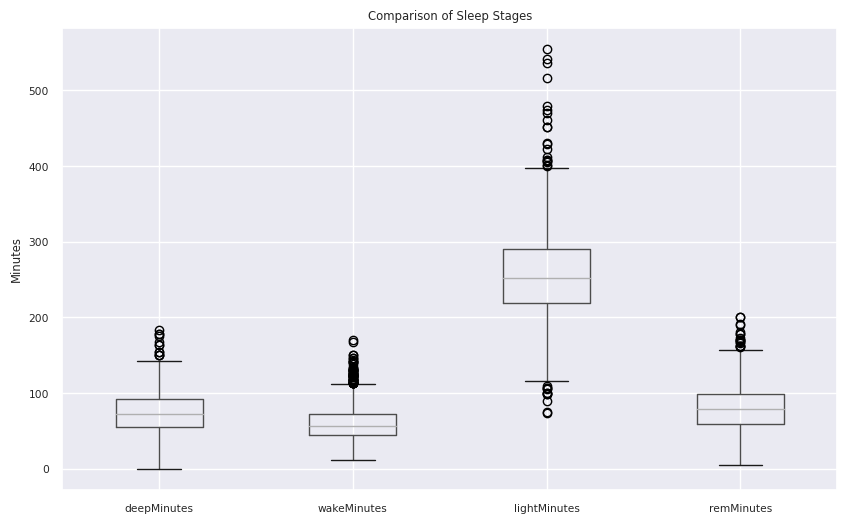

In [59]:
#boxplot to compare minutes spent in different sleep stages
plt.figure(figsize=(10, 6))
sleeping[['deepMinutes', 'wakeMinutes', 'lightMinutes', 'remMinutes']].boxplot()
plt.title('Comparison of Sleep Stages')
plt.ylabel('Minutes')
plt.show()

In [60]:
directories = [folder_name for folder_name in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder_name))]
print(directories)

['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']


In [61]:
sleep_score = []
for folder_name in directories:
    folder_path = os.path.join(main_folder_path, folder_name,'fitbit')
    file_path = os.path.join(folder_path, 'sleep_score.csv')
    df = pd.read_csv(file_path)
    df['user_id'] = folder_name
    sleep_score.append(df)

sleep_score_df = pd.concat(sleep_score, ignore_index=True).sort_values(by=['user_id', 'timestamp']).reset_index(drop=True)
sleep_score_df.head()

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,user_id
0,2019-11-01T06:29:30Z,24472394143,76,18,20,38,27,53,0.053635,p01
1,2019-11-02T07:19:30Z,24486013387,79,20,22,37,36,53,0.078978,p01
2,2019-11-03T07:34:30Z,24497341340,71,16,17,38,38,52,0.093491,p01
3,2019-11-04T06:35:00Z,24507914069,68,15,15,38,37,53,0.064851,p01
4,2019-11-05T06:25:00Z,24521896102,73,15,22,36,26,54,0.093185,p01


In [62]:
sleeping_score = sleeping.merge(sleep_score_df, left_on = 'logId', right_on = 'sleep_log_entry_id', how = 'inner')
sleeping_score = sleeping_score.drop(columns=['duration','timeInBed','user_id_x','timestamp', 'sleep_log_entry_id','user_id_y'])
sleeping_score.head()

,logId,dateOfSleep,startTime,endTime,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,efficiency,type,infoCode,mainSleep,deepMinutes,wakeMinutes,lightMinutes,remMinutes,duration[hr],timeInBed[hr],Participant ID,Age,Height,Gender,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,0,378,52,0,97,stages,0,True,36.0,52.0,259.0,83.0,7,7,p01,48,195,male,79,20,22,37,36,53,0.078978
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,0,378,44,0,96,stages,0,True,38.0,44.0,289.0,51.0,7,7,p01,48,195,male,71,16,17,38,38,52,0.093491
2,24507914069,2019-11-04,2019-11-03 23:55:30,2019-11-04T06:35:00.000,0,361,38,0,96,stages,0,True,37.0,38.0,289.0,35.0,6,6,p01,48,195,male,68,15,15,38,37,53,0.064851
3,24521896102,2019-11-05,2019-11-05 00:22:30,2019-11-05T06:25:00.000,0,326,36,1,99,stages,0,True,27.0,36.0,260.0,39.0,6,6,p01,48,195,male,73,15,22,36,26,54,0.093185
4,24534036899,2019-11-06,2019-11-06 00:25:30,2019-11-06T06:29:30.000,0,341,23,1,99,stages,0,True,66.0,23.0,237.0,38.0,6,6,p01,48,195,male,67,17,13,37,65,52,0.064472


In [63]:
sleeping_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   logId                  1894 non-null   int64         
 1   dateOfSleep            1894 non-null   datetime64[ns]
 2   startTime              1894 non-null   object        
 3   endTime                1894 non-null   object        
 4   minutesToFallAsleep    1894 non-null   int64         
 5   minutesAsleep          1894 non-null   int64         
 6   minutesAwake           1894 non-null   int64         
 7   minutesAfterWakeup     1894 non-null   int64         
 8   efficiency             1894 non-null   int64         
 9   type                   1894 non-null   object        
 10  infoCode               1894 non-null   int64         
 11  mainSleep              1894 non-null   bool          
 12  deepMinutes            1890 non-null   float64       
 13  wak

The dataset contains 1,894 sleep records with 29 columns, including information about sleep stages, efficiency, and various sleep scores. Most columns are complete, though some related to sleep stages, such as deep and light minutes, have a few missing values. Key metrics include sleep duration, efficiency, and sleep quality scores (e.g., overall score, revitalization score), providing comprehensive insights into participants' sleep patterns.

In [64]:
sleeping_score.describe()

,logId,dateOfSleep,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,efficiency,infoCode,deepMinutes,wakeMinutes,lightMinutes,remMinutes,duration[hr],timeInBed[hr],Age,Height,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,1.894000e+03,1894,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1890.000000,1890.000000,1890.000000,1890.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,2.547573e+10,2020-01-15 05:28:26.863780352,0.021119,409.372756,60.388068,0.771911,94.374340,0.001056,73.558730,60.444444,256.044444,79.500000,7.358501,7.358501,35.992080,179.609293,76.488384,19.244984,18.986800,38.256600,73.312038,58.597149,0.090629
min,2.447389e+10,2019-11-01 00:00:00,0.000000,132.000000,11.000000,0.000000,0.000000,0.000000,0.000000,11.000000,74.000000,5.000000,3.000000,3.000000,23.000000,163.000000,35.000000,12.000000,5.000000,3.000000,0.000000,44.000000,0.015385
25%,2.496997e+10,2019-12-11 00:00:00,0.000000,361.000000,45.000000,0.000000,92.250000,0.000000,55.000000,45.250000,219.000000,58.250000,6.000000,6.000000,26.000000,177.000000,72.000000,17.000000,17.000000,35.000000,55.000000,53.000000,0.062376
50%,2.543212e+10,2020-01-14 00:00:00,0.000000,408.000000,57.000000,0.000000,95.000000,0.000000,73.000000,57.000000,252.000000,79.000000,7.000000,7.000000,31.000000,180.000000,77.000000,19.000000,20.000000,39.000000,72.000000,59.000000,0.084622
75%,2.596108e+10,2020-02-18 00:00:00,0.000000,458.000000,72.000000,0.000000,97.000000,0.000000,92.000000,72.000000,291.000000,99.000000,8.000000,8.000000,45.000000,182.000000,82.000000,21.000000,21.000000,42.000000,91.000000,65.000000,0.110449
max,2.654316e+10,2020-03-30 00:00:00,14.000000,823.000000,170.000000,33.000000,100.000000,1.000000,183.000000,170.000000,555.000000,201.000000,15.000000,15.000000,60.000000,195.000000,94.000000,25.000000,25.000000,47.000000,183.000000,76.000000,0.294766
std,5.790198e+08,NaN,0.464910,79.600531,21.786868,2.116205,4.540456,0.032487,27.799555,21.747099,58.580058,31.091495,1.588319,1.588319,11.949906,7.158638,7.768210,2.403151,3.308944,5.122962,27.805951,7.078744,0.037331


On average, participants slept for around 409 minutes (about 6.8 hours) per night, with an average efficiency of 94.37%. The mean deep sleep duration is approximately 73.56 minutes, and the average resting heart rate during sleep is 58.60 bpm. There is variation in sleep duration and quality, with the longest recorded sleep being 823 minutes (about 13.7 hours) and the highest deep sleep recorded at 183 minutes. The sleep quality scores (overall, composition, revitalization, and duration) have a mean between 18 and 76, indicating a wide range of sleep patterns and quality among participants.

In [65]:
sc_analysis = sleeping_score[['duration[hr]','deepMinutes','wakeMinutes','lightMinutes','remMinutes','overall_score',
                              'composition_score', 'revitalization_score', 'duration_score', 'deep_sleep_in_minutes',
                              'resting_heart_rate', 'restlessness']]

sc_analysis.describe()

,duration[hr],deepMinutes,wakeMinutes,lightMinutes,remMinutes,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,1894.000000,1890.000000,1890.000000,1890.000000,1890.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,7.358501,73.558730,60.444444,256.044444,79.500000,76.488384,19.244984,18.986800,38.256600,73.312038,58.597149,0.090629
std,1.588319,27.799555,21.747099,58.580058,31.091495,7.768210,2.403151,3.308944,5.122962,27.805951,7.078744,0.037331
min,3.000000,0.000000,11.000000,74.000000,5.000000,35.000000,12.000000,5.000000,3.000000,0.000000,44.000000,0.015385
25%,6.000000,55.000000,45.250000,219.000000,58.250000,72.000000,17.000000,17.000000,35.000000,55.000000,53.000000,0.062376
50%,7.000000,73.000000,57.000000,252.000000,79.000000,77.000000,19.000000,20.000000,39.000000,72.000000,59.000000,0.084622
75%,8.000000,92.000000,72.000000,291.000000,99.000000,82.000000,21.000000,21.000000,42.000000,91.000000,65.000000,0.110449
max,15.000000,183.000000,170.000000,555.000000,201.000000,94.000000,25.000000,25.000000,47.000000,183.000000,76.000000,0.294766


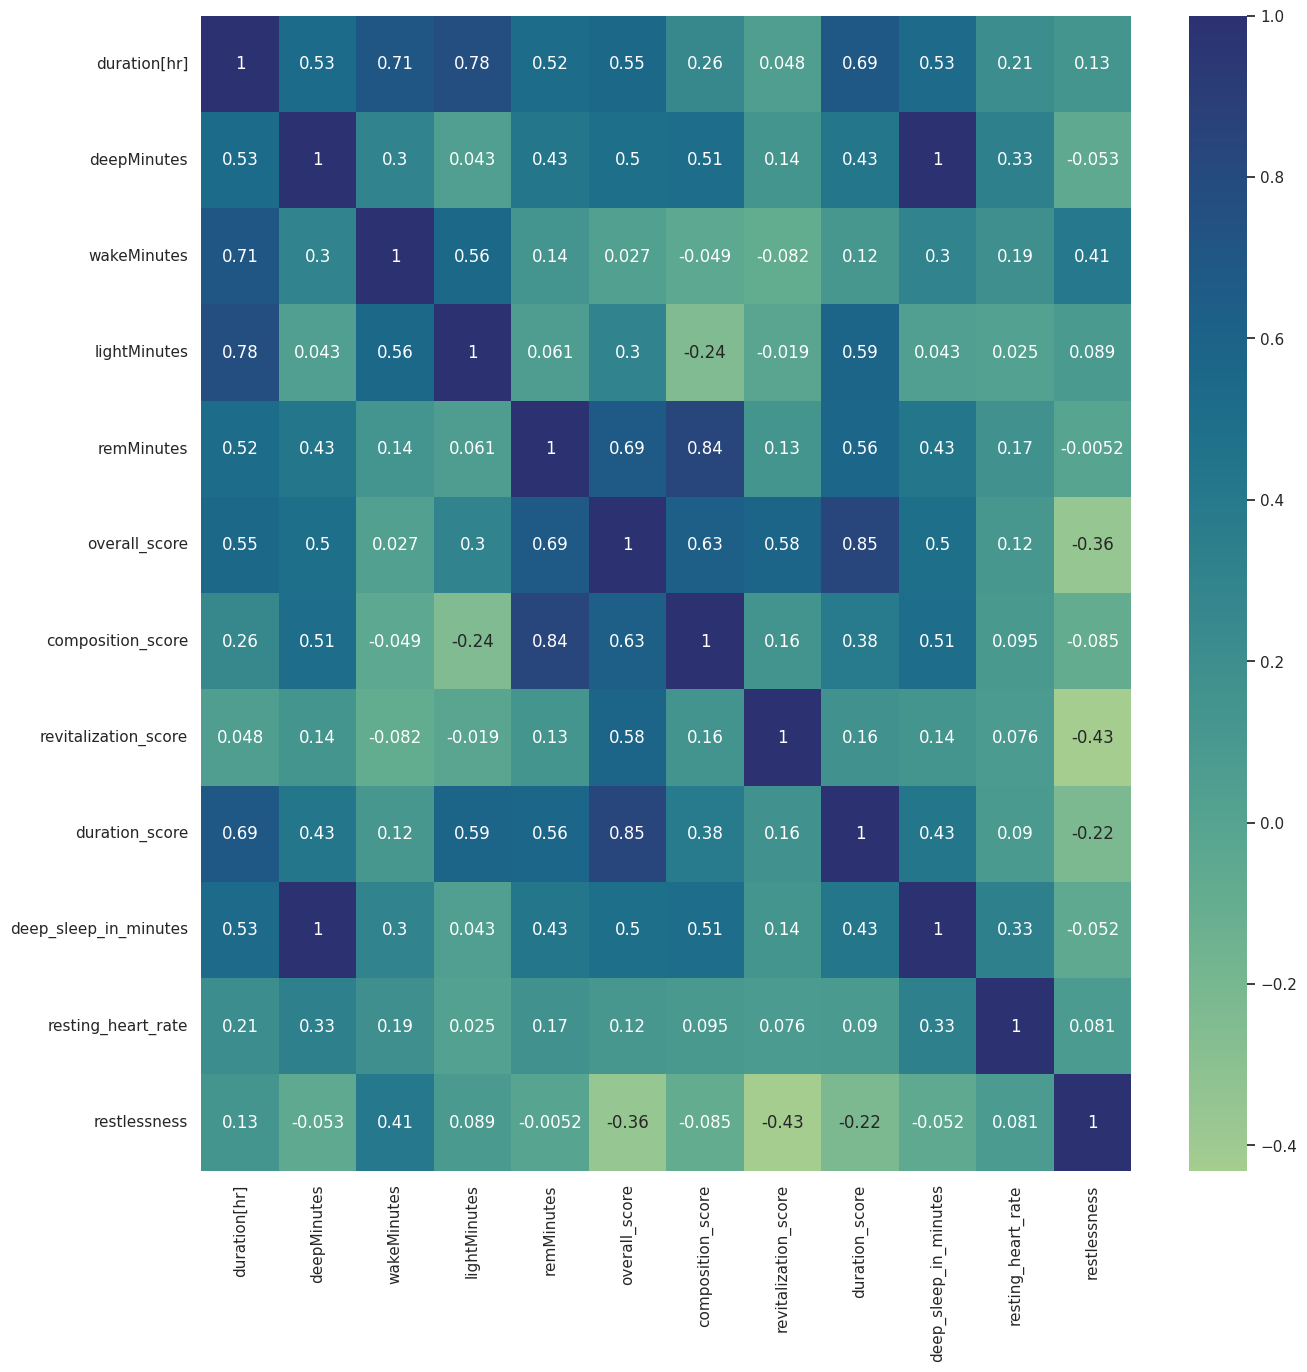

In [66]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.set(font_scale=1)
heatmap = sns.heatmap(sc_analysis.corr(numeric_only = True),annot=True,cmap='crest')
plt.yticks(rotation=0, ha='right')
plt.show();

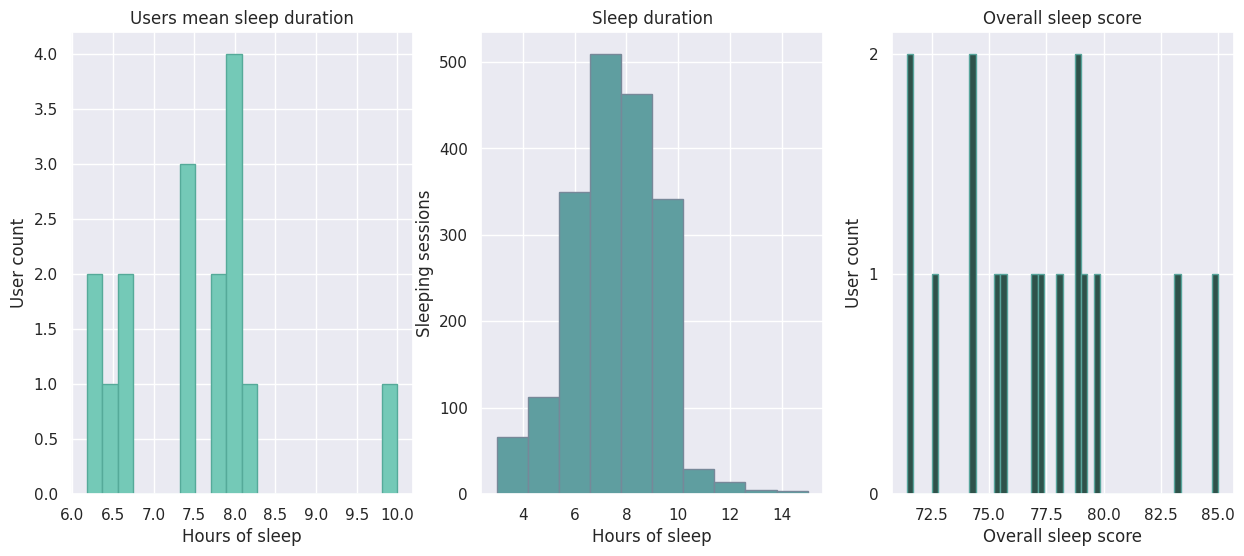

In [67]:
durationHr = sleeping_score.groupby('Participant ID')['duration[hr]'].mean()

overall_score = sleeping_score.groupby('Participant ID')['overall_score'].mean()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

durationHr.plot(kind='hist', color='#74c9b7', edgecolor='#55aa99',bins=20, ax=axes[0])
axes[0].set(title='Users mean sleep duration', xlabel='Hours of sleep', ylabel = 'User count')
axes[0].set_xticks(np.arange(6, 10.5, step=0.5))
sleeping_score['duration[hr]'].plot(kind='hist',color = 'cadetblue', edgecolor = 'lightslategrey', bins =10,ax =axes[1])
axes[1].set(title='Sleep duration', xlabel='Hours of sleep', ylabel='Sleeping sessions')
g = overall_score.plot(kind='hist', color='#2e524a', edgecolor='#58a59c',bins=50,ax =axes[2])
axes[2].set(title='Overall sleep score', xlabel='Overall sleep score', ylabel='User count')
axes[2].set_yticks(np.arange(0, 3, step=1))
plt.show()

In [68]:
averages= sleeping_score.groupby('Gender')[['duration[hr]','overall_score','remMinutes','deepMinutes','restlessness']].mean()
print('Average values by gender:')
print(averages)

Average values by gender:
        duration[hr]  overall_score  remMinutes  deepMinutes  restlessness
Gender                                                                    
female      7.760870      77.480978   93.250000    80.847826      0.100781
male        7.261468      76.249017   76.175427    71.796321      0.088180


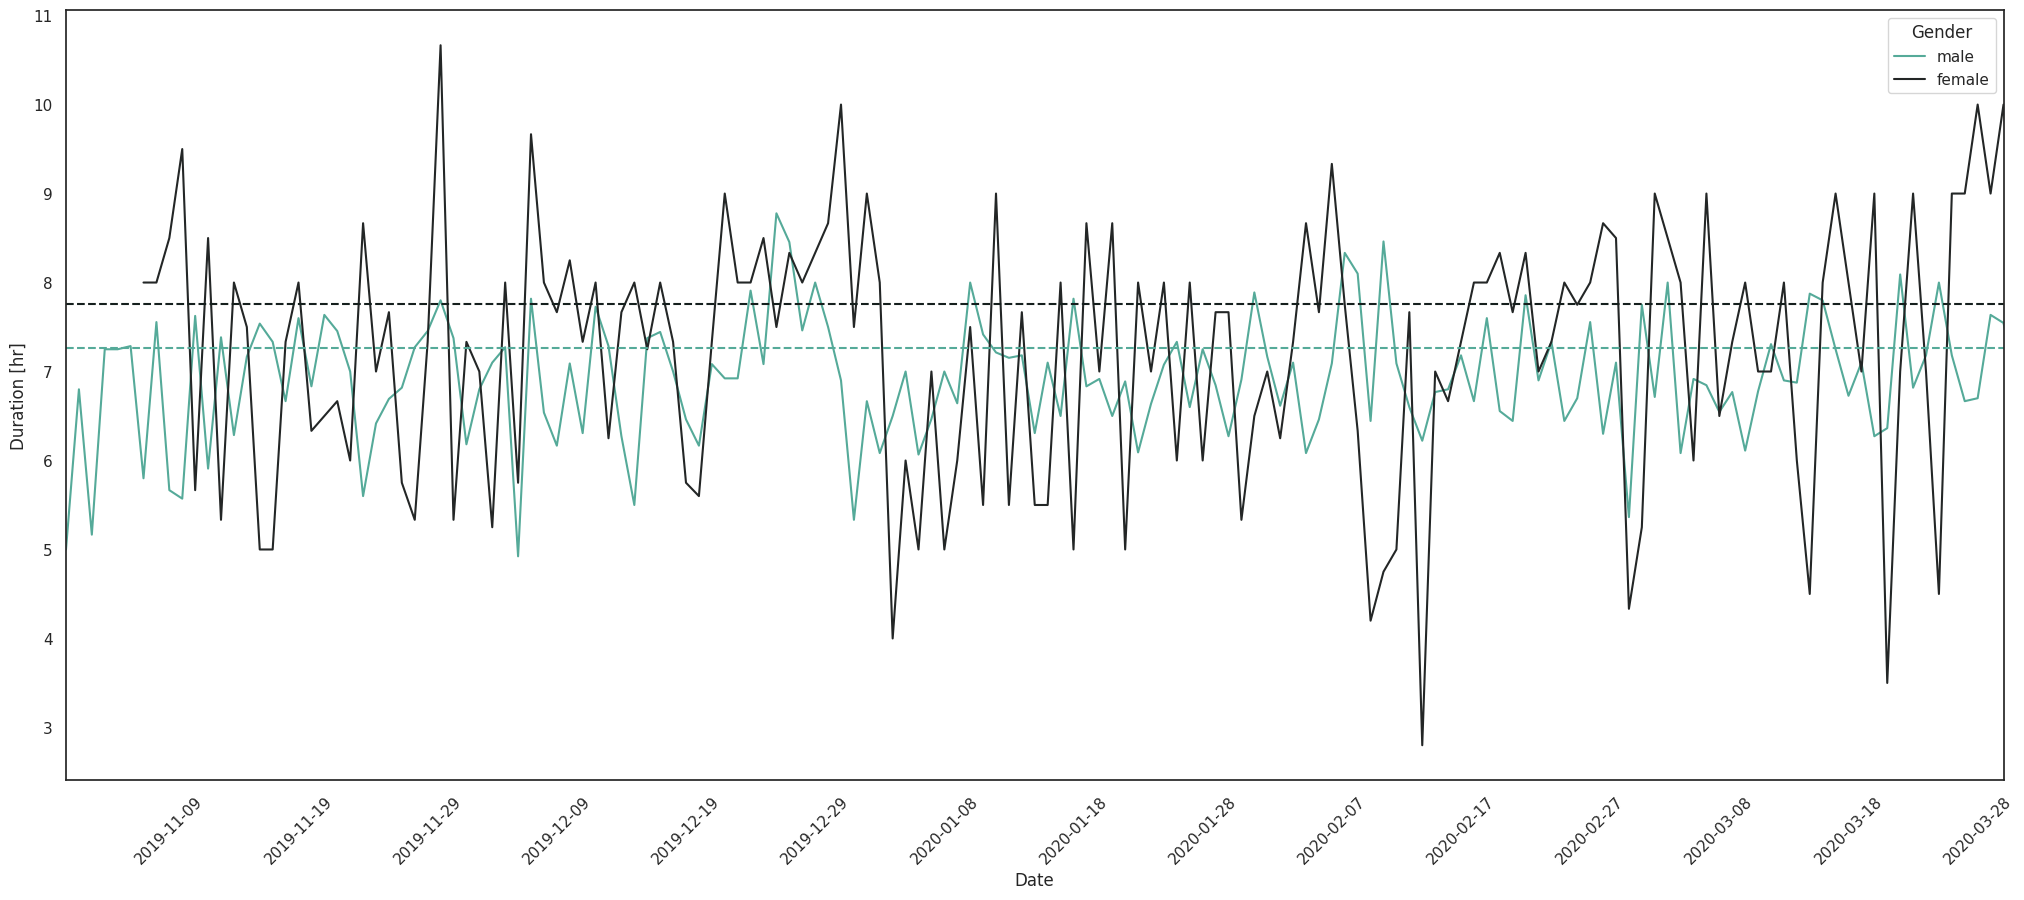

In [69]:
sleep_average_duration = sleeping_score.groupby('Gender')['duration[hr]'].mean()
plt_1 = plt.figure(figsize=(25, 10))

sns.set_theme(style='white', font_scale=1)

g = sns.lineplot( x = 'dateOfSleep',
              y = 'duration[hr]',
              data = sleeping,
              hue='Gender',
              palette= 'dark:#5A9_r',
              errorbar=None)
for gender, avg_dur in sleep_average_duration.items():
    plt.axhline(y=avg_dur, color=colors_active[gender], linestyle='--', label=f'Average {gender}')



g.set_xlim(sleeping_score['dateOfSleep'].min(), sleeping_score['dateOfSleep'].max())


g.xaxis.set_major_locator(DayLocator(interval=10))
g.xaxis.set_minor_locator(DayLocator(interval=1))
g.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

g.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')

fig.autofmt_xdate()

plt.xticks(rotation=45)
g.set(xlabel = 'Date',
     ylabel = 'Duration [hr]')
plt.show()

In [70]:
df = sleeping_score.rename(columns ={'deepMinutes': 'Deep Sleep','wakeMinutes': 'Awake','lightMinutes': 'Light sleep','remMinutes': 'REM sleep'})
color_stages ={'Deep Sleep': '#7a7b9d','Awake': '#698e9b','Light sleep':'#55aa99','REM sleep':'#808080'}
sleeping_stages_long = pd.melt(df, id_vars= 'logId', value_vars=['Deep Sleep','Awake','Light sleep','REM sleep'])
df= sleeping_stages_long.groupby('variable').mean()
df = df['value'].sort_values(ascending = False)
print(df);

variable
Light sleep    256.044444
REM sleep       79.500000
Deep Sleep      73.558730
Awake           60.444444
Name: value, dtype: float64


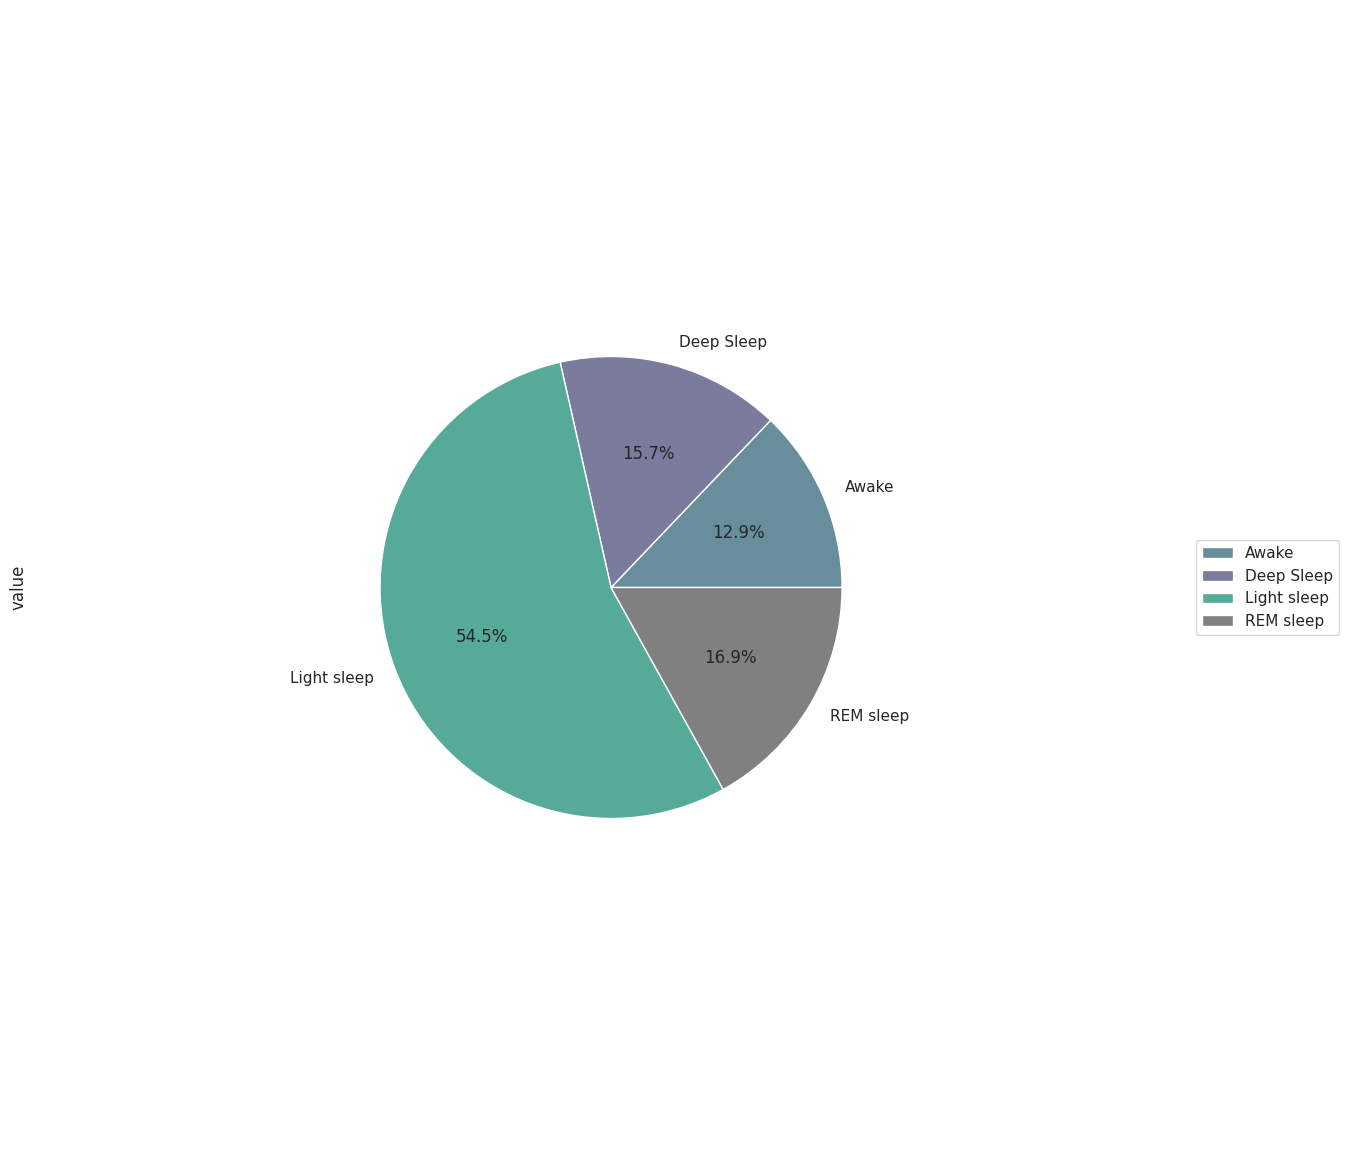

In [71]:
sleeping_stages_summary = sleeping_stages_long.groupby('variable').sum()
sleeping_stages_summary.plot(kind='pie', y='value', radius=0.5, autopct='%1.1f%%', colors=[color_stages[stage] for stage in sleeping_stages_summary.index])
plt.legend( loc="center left", bbox_to_anchor=(1, 0.5))
plt.show();

**ANNALYSIS Results**

Firstly, when considering the activities tracked by Fitbit, running emerged as the most favored workout among users. This popularity highlights the preference for high-impact exercises that can be logged automatically.

Next, regarding calorie expenditure, outdoor running, treadmill workouts, spinning, and biking proved to be the most effective in burning calories. These activities not only showcased significant calorie loss but also maintained a favorable ratio of calories burned per minute, alongside extended durations spent at elevated activity levels.

Examining the days when participants were most active reveals interesting trends. For male athletes, Sunday stood out as the peak day for physical activity, closely followed by Saturday. During weekends, males engaged in more rigorous training sessions, achieving substantial calorie burns. In contrast, female participants showed a different pattern; they were particularly active on Saturdays but exhibited higher intensity workouts on Mondays and Thursdays, leading to greater calorie expenditure and more time spent in high-energy zones.

When assessing sleep patterns, participants' average sleep durations were 7.3 hours for men and 7.7 hours for women. These figures surpass the recommended seven hours for general health yet fall short of the ideal 8.3 hours suggested for elite athletes, indicating room for improvement.

Analysis of sleep stages revealed that a majority of total sleep time, approximately 54.5%, was spent in light sleep. This suggests that while participants may be getting adequate hours, the quality of that sleep could be enhanced.

Evaluating overall sleep quality, women had an average score of 77.48, while men scored slightly lower at 76.25. According to Fitbit’s scoring criteria, which classifies scores between 72 and 83 as typical, most participants found themselves within the "Fair" range. This indicates that while they may be getting enough sleep, the quality is not optimal and could benefit from further attention.

**Conclusions**

The analysis of training sessions and their impact on calorie expenditure reveals several key insights. Firstly, it is evident that the duration of a training session directly correlates with the number of calories burned. Longer sessions provide more opportunities for the body to engage in sustained activity, ultimately leading to higher energy expenditure. However, the relationship between workout duration and calorie burn is not merely linear; it requires a nuanced understanding of how activity intensity influences this dynamic.

It becomes apparent that the time spent at elevated activity levels is more critical for effective calorie burning than simply the total length of a workout. Athletes who wish to optimize their calorie expenditure should prioritize exercises that allow them to maintain high activity levels over extended periods. For instance, while interval training can be effective, its short bursts of high intensity might limit overall calorie burn if the sessions are too brief. Conversely, low-intensity activities such as hiking can prolong workout duration but may not reach the caloric thresholds desired due to their less demanding nature. Thus, striking a balance between intensity and duration is essential for achieving significant calorie burn.

In pursuit of maximizing calorie burn per session, it is recommended that athletes spend more time within the Cardio heart rate zone. This specific zone promotes sustained high activity levels, leading to an increased calorie burn throughout the workout. By ensuring that workouts are designed to keep heart rates elevated, athletes can enhance their energy expenditure significantly, making each training session more effective in terms of calorie loss.

Sleep quality also plays a crucial role in the overall well-being and performance of athletes. Surprisingly, only 38% of participants (6 out of 16) reported an average sleep duration that exceeded the recommended 8.3 hours for elite athletes. This shortfall suggests a potential area for improvement, as adequate rest is fundamental for recovery and performance. Moreover, the data reveals that a mere 19% of participants achieved a good sleep quality score, highlighting a widespread issue among athletes regarding sleep health.

Interestingly, the findings indicate that the quality of sleep may be more significant than the sheer quantity. While getting a sufficient number of hours is beneficial, it becomes ineffective if the individual experiences restlessness or frequent awakenings throughout the night. Athletes need to ensure not just that they are in bed long enough, but that they are achieving restful, uninterrupted sleep to feel truly refreshed upon waking.

The National Library of Medicine recommends that deep sleep (N3) and REM sleep each comprise 25% of total sleep time, collectively amounting to 50%. However, the results from this study show that these critical sleep stages account for only 32.6% of the athletes' total sleep. This significant deficit may explain why most participants did not achieve a good or excellent sleep score. The lack of adequate deep and REM sleep can hinder recovery, cognitive function, and overall athletic performance, underscoring the importance of focusing on both sleep duration and quality to support optimal health and performance.



**Recommendations**

To enhance the validity and applicability of future findings regarding calorie burn and overall fitness, it is crucial to broaden the scope of the data collected. Notably, walking data currently constitutes 56% of the total dataset, which may skew the results and limit the generalizability of conclusions drawn about different types of exercises. Therefore, future studies should prioritize capturing a wider variety of exercise data. This could include activities such as strength training, high-intensity interval training (HIIT), swimming, and yoga. By diversifying the types of workouts recorded, researchers can obtain a more comprehensive understanding of how different forms of exercise contribute to calorie burn, allowing for more nuanced recommendations tailored to specific athletic goals.

It may be beneficial to consider grouping similar activities together for analysis. For instance, combining data from "outdoor bike" and "stationary bike" could provide valuable insights into any discrepancies or similarities in calorie expenditure and performance metrics. This approach could reveal whether the environment (indoor versus outdoor) significantly influences the outcomes, or if the physiological responses to these activities are comparable. Such groupings would not only streamline the data analysis process but could also uncover trends that were not apparent in the previous project, leading to a richer interpretation of the data.

Exploring the relationship between activity level and both sleep quality and duration represents an important area for future research. Understanding how different levels of physical exertion impact sleep patterns could provide athletes with critical insights into optimizing their training regimens and recovery strategies. For instance, researchers could investigate whether higher activity levels correlate with improved sleep quality or if they lead to increased fatigue that detracts from restful sleep. Establishing this relationship could pave the way for targeted interventions designed to enhance both physical performance and sleep health.

Encouraging athletes to maintain a sleep journal could be instrumental in identifying external factors that influence their sleep quality. A sleep journal would allow participants to document their nightly sleep patterns, duration, and subjective feelings of restfulness upon waking, alongside other factors such as dietary habits, stress levels, and training intensity. Analyzing this qualitative data in conjunction with quantitative sleep metrics could reveal correlations and trends that inform athletes about the lifestyle choices that best support their sleep quality. By fostering awareness of their sleep habits and environmental influences, athletes can make informed adjustments to improve their recovery and performance.

# **Machine Learning Modelling**

UNSUPERVISED CLUSTERING ON EXERCISES DATA

In [84]:
exercise_data_cleaned = exercises.copy()
# exercise_data_cleaned.dropna(inplace=True)

In [85]:
exercise_features = exercise_data_cleaned[['calories', 'duration[min]', 'minutes_very_active',
                                           'minutes_fairly_active', 'minutes_lightly_active']]

In [86]:
exercise_features

,calories,duration[min],minutes_very_active,minutes_fairly_active,minutes_lightly_active
0,192,22.183333,14,8,0
1,714,41.233333,41,0,0
2,127,16.216667,6,8,3
3,748,77.650000,65,7,3
4,617,68.266667,48,19,1
...,...,...,...,...,...
2426,82,15.366667,0,0,15
2427,82,15.366667,0,0,14
2428,109,19.633333,5,8,5
2429,147,24.750000,4,5,16


In [87]:
scaler = StandardScaler()
exercise_features_scaled = scaler.fit_transform(exercise_features)

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(exercise_features_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

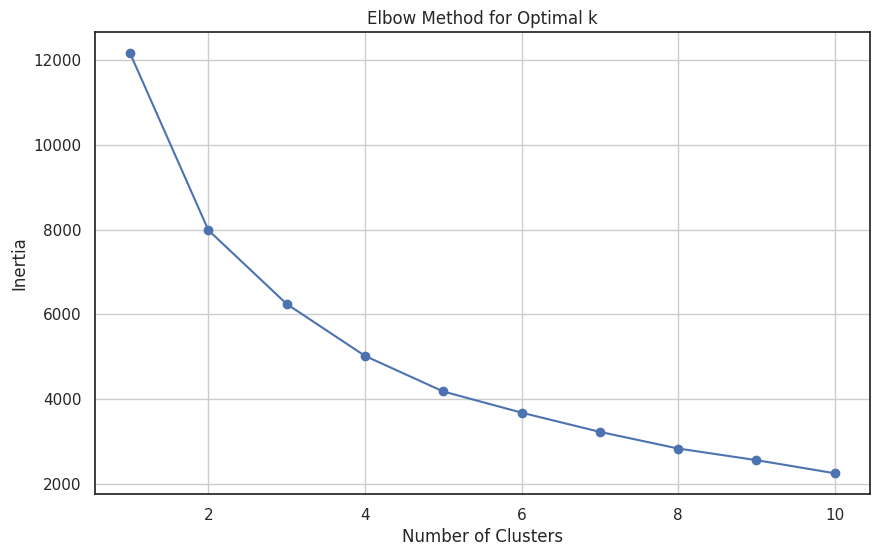

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [95]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
exercise_clusters = kmeans.fit_predict(exercise_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
exercise_data_cleaned['exercise_cluster'] = exercise_clusters

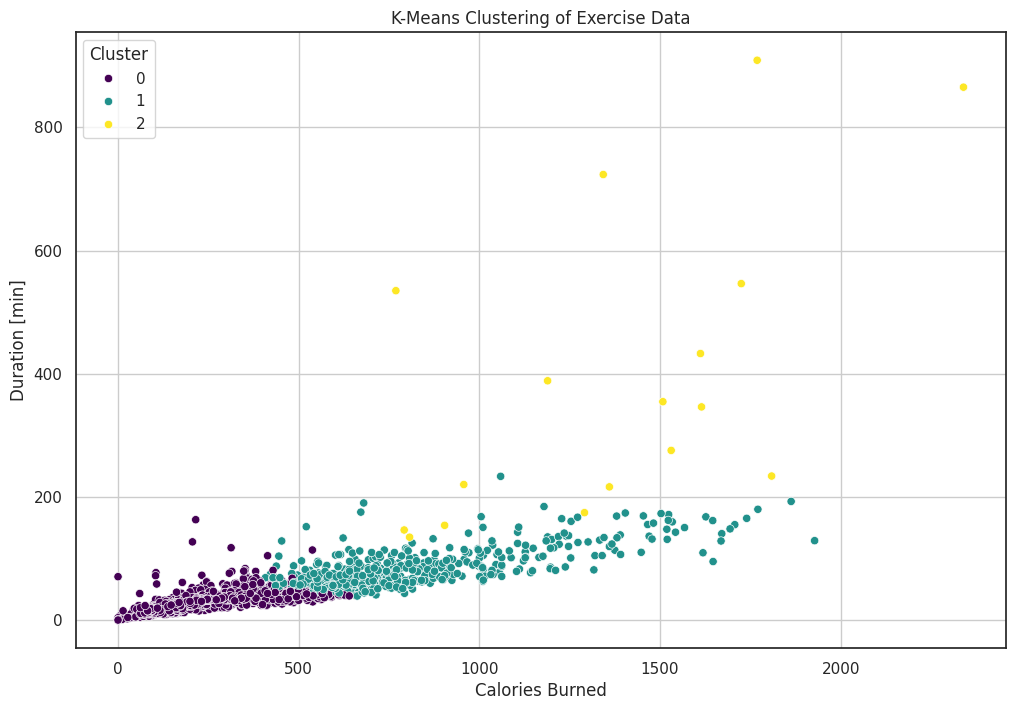

In [97]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='calories', y='duration[min]', hue='exercise_cluster', data=exercise_data_cleaned, palette='viridis')
plt.title('K-Means Clustering of Exercise Data')
plt.xlabel('Calories Burned')
plt.ylabel('Duration [min]')
plt.legend(title='Cluster')
plt.grid()
plt.show()

**SLEEP DATA UNSUPERVISED CLUSTERING**

In [88]:
sleep_data_cleaned = sleeping_score.copy()

In [99]:
sleep_features = sleep_data_cleaned[['duration[hr]', 'deepMinutes', 'lightMinutes',
                                      'remMinutes', 'overall_score']]

sleep_features.dropna(inplace=True)

<ipython-input-99-17c1d80b883c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_features.dropna(inplace=True)


In [100]:
sleep_features

,duration[hr],deepMinutes,lightMinutes,remMinutes,overall_score
0,7,36.0,259.0,83.0,79
1,7,38.0,289.0,51.0,71
2,6,37.0,289.0,35.0,68
3,6,27.0,260.0,39.0,73
4,6,66.0,237.0,38.0,67
...,...,...,...,...,...
1889,5,62.0,183.0,49.0,68
1890,8,134.0,228.0,107.0,86
1891,7,82.0,246.0,91.0,83
1892,8,96.0,254.0,92.0,83


In [101]:
sleep_features_scaled = scaler.fit_transform(sleep_features)

In [102]:
inertia_sleep = []
for i in range(1, 11):
    kmeans_sleep = KMeans(n_clusters=i, random_state=42)
    kmeans_sleep.fit(sleep_features_scaled)
    inertia_sleep.append(kmeans_sleep.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

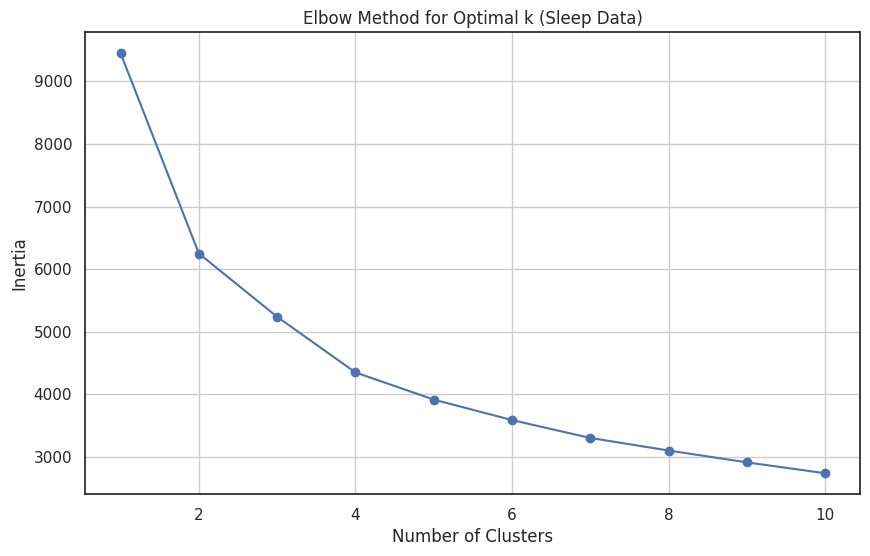

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_sleep, marker='o')
plt.title('Elbow Method for Optimal k (Sleep Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [104]:
optimal_k_sleep = 3
kmeans_sleep = KMeans(n_clusters=optimal_k_sleep, random_state=42)
sleep_clusters = kmeans_sleep.fit_predict(sleep_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [106]:
sleep_features['sleep_cluster'] = sleep_clusters

<ipython-input-106-6e7bac717926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_features['sleep_cluster'] = sleep_clusters


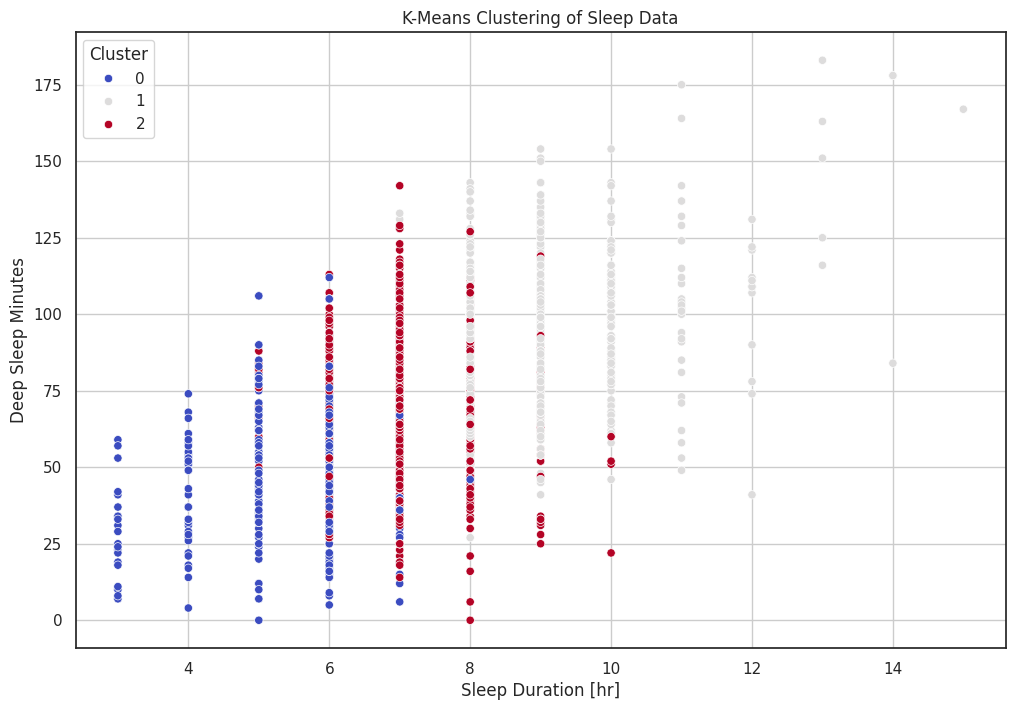

In [107]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='duration[hr]', y='deepMinutes', hue='sleep_cluster', data=sleep_features, palette='coolwarm')
plt.title('K-Means Clustering of Sleep Data')
plt.xlabel('Sleep Duration [hr]')
plt.ylabel('Deep Sleep Minutes')
plt.legend(title='Cluster')
plt.grid()
plt.show()

**Predictive Modelling**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
merged_data = sleeping_score.merge(exercise_data_cleaned, on='Participant ID', how='inner')
datas = merged_data[['calories', 'duration[min]', 'averageHeartRate',
                  'deepMinutes', 'lightMinutes', 'remMinutes',
                  'minutes_very_active', 'minutes_fairly_active',
                  'minutes_lightly_active', 'overall_score']]
datas.dropna(inplace=True)

<ipython-input-124-b9f93651e4c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.dropna(inplace=True)


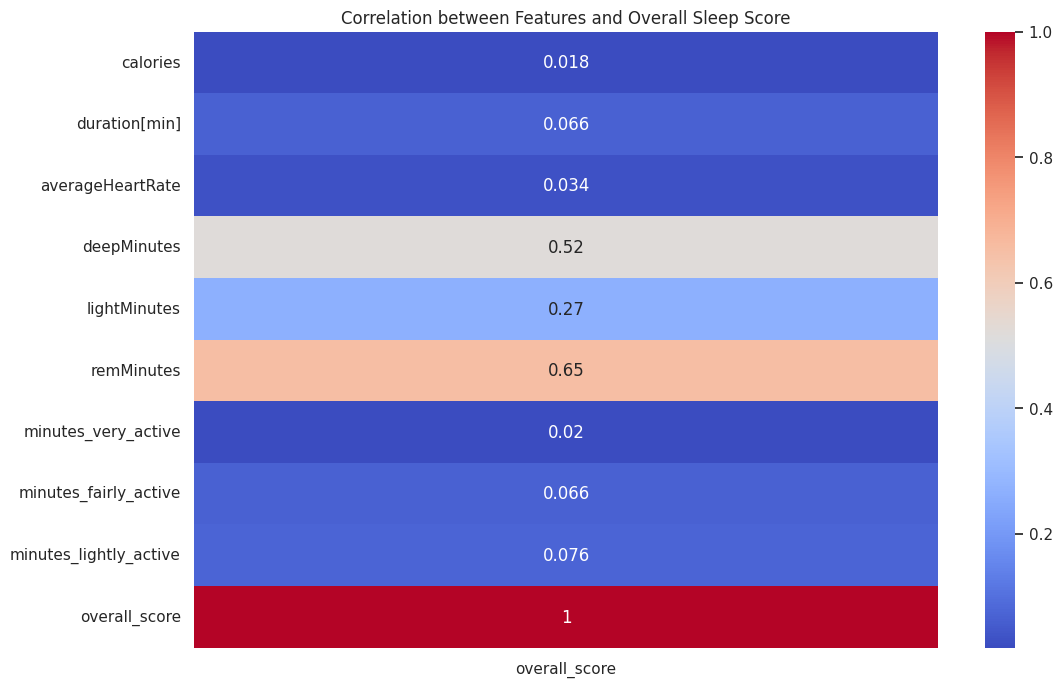

In [136]:
plt.figure(figsize=(12, 8))
correlation_matrix = datas.corr()
sns.heatmap(correlation_matrix[['overall_score']], annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Overall Sleep Score')
plt.show()

In [125]:
X = datas[['calories', 'duration[min]', 'averageHeartRate',
                  'deepMinutes', 'lightMinutes', 'remMinutes',
                  'minutes_very_active', 'minutes_fairly_active',
                  'minutes_lightly_active']]
y = datas['overall_score']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForestRegressor

In [127]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [128]:
rf_predictions = rf_model.predict(X_test)
print('Random Forest Model Performance:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_predictions))
print('R^2 Score:', r2_score(y_test, rf_predictions))

Random Forest Model Performance:
Mean Squared Error: 0.009792871835571173
R^2 Score: 0.9998369971736538


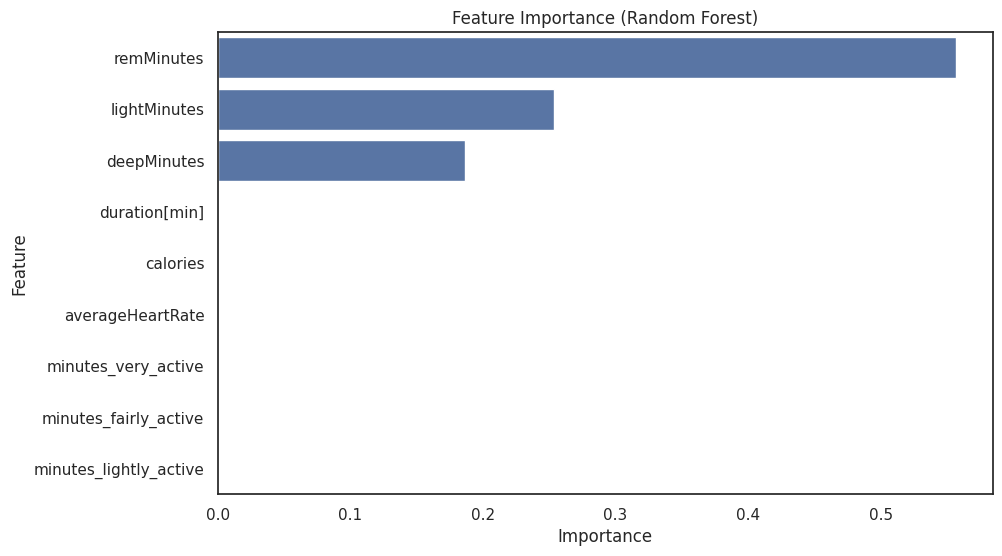

In [134]:
feature_importances_rf = rf_model.feature_importances_
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

GradientBoostingRegressor

In [129]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [130]:
gb_predictions = gb_model.predict(X_test)
print('Gradient Boosting Model Performance:')
print('Mean Squared Error:', mean_squared_error(y_test, gb_predictions))
print('R^2 Score:', r2_score(y_test, gb_predictions))

Gradient Boosting Model Performance:
Mean Squared Error: 17.86524145904561
R^2 Score: 0.7026321900177501


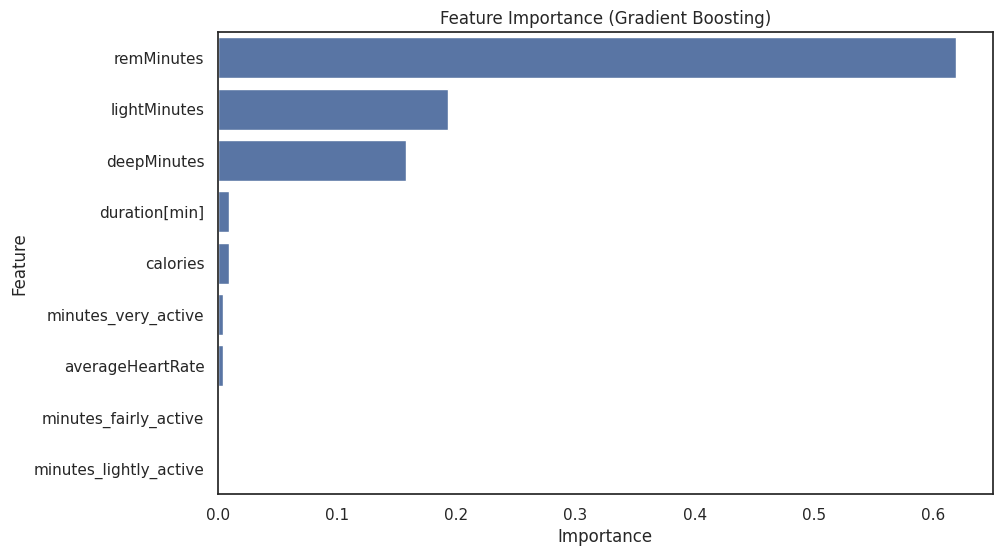

In [135]:
feature_importances_gb = gb_model.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': features, 'Importance': feature_importances_gb})
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb)
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

Linear Regression model

In [131]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [132]:
lr_predictions = lr_model.predict(X_test)
print('Linear Regression Model Performance:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_predictions))
print('R^2 Score:', r2_score(y_test, lr_predictions))

Linear Regression Model Performance:
Mean Squared Error: 25.833531387683227
R^2 Score: 0.5699996179467556


Results Visualisations

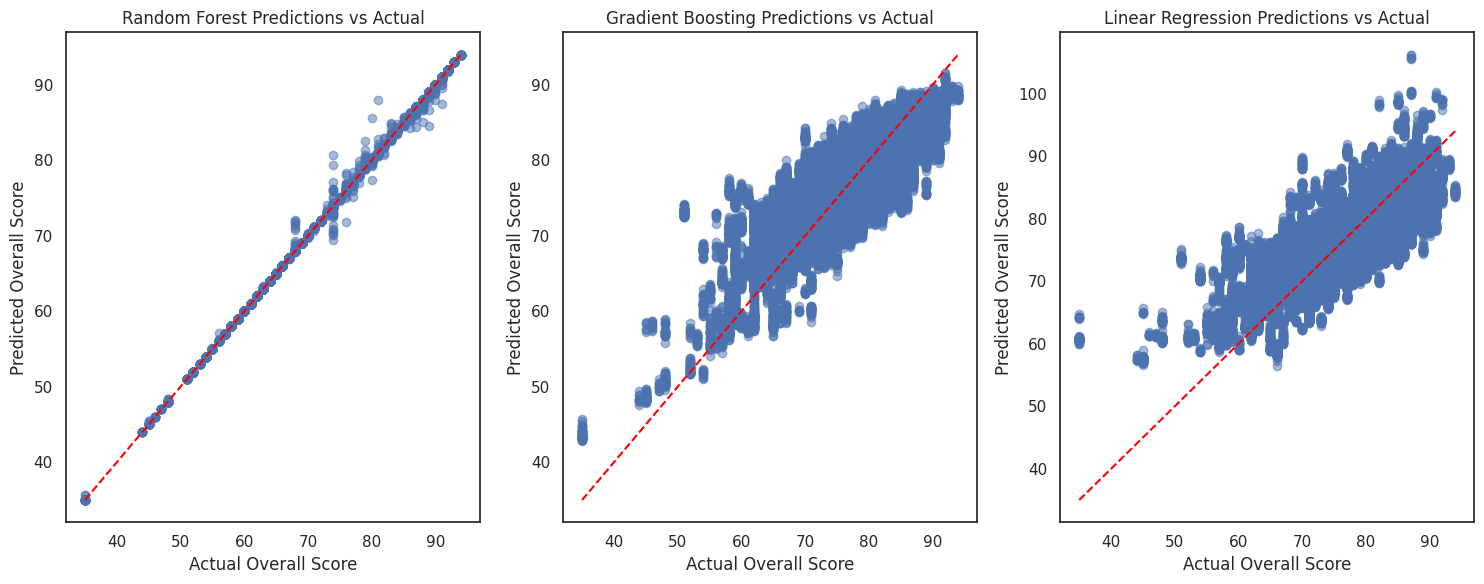

In [133]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')

plt.subplot(1, 3, 2)
plt.scatter(y_test, gb_predictions, alpha=0.5)
plt.title('Gradient Boosting Predictions vs Actual')
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')

plt.subplot(1, 3, 3)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')

plt.tight_layout()
plt.show()